In [3]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils_IO import get_data

# Load data

In [6]:
query = 'SELECT * FROM "EP_Battery.Thing_HMD8310"'
df = get_data(query)
print(df.shape)
df.head(10)

(477586, 110)


time  AVG_PACK_SOC  AvgSOC  AvgSOH BATT_PACK_1_DISCONN  \
0  2022-08-30T00:00:00Z           NaN    77.0   100.0                None   
1  2022-08-30T00:01:00Z           NaN    77.0   100.0                None   
2  2022-08-30T00:02:00Z           NaN    77.0   100.0                None   
3  2022-08-30T00:03:00Z           NaN    77.0   100.0                None   
4  2022-08-30T00:04:00Z           NaN    77.0   100.0                None   
5  2022-08-30T00:05:00Z           NaN    77.0   100.0                None   
6  2022-08-30T00:06:00Z           NaN    77.0   100.0                None   
7  2022-08-30T00:07:00Z           NaN    77.0   100.0                None   
8  2022-08-30T00:08:00Z           NaN    77.0   100.0                None   
9  2022-08-30T00:09:00Z           NaN    77.0   100.0                None   

  BATT_PACK_1_FAULT BATT_PACK_1_WARN BATT_PACK_2_DISCONN BATT_PACK_2_FAULT  \
0              None             None                None              None   
1              None             None                None              None   
2              None             None                None              None   
3              None             None                None              None   
4              None             None                None              None   
5              None             None                None              None   
6              None             None                None              None   
7              None             None                None              None   
8              None             None                None              None   
9              None             None                None              None   

  BATT_PACK_2_WARN  ... PACK_1_STATUS PACK_2_STATUS PACK_3_STATUS  \
0             None  ...           NaN           NaN           NaN   
1             None  ...           NaN           NaN           NaN   
2             None  ...           NaN           NaN           NaN   
3             None  ...           NaN           NaN           NaN   
4             None  ...           NaN           NaN           NaN   
5             None  ...           NaN           NaN           NaN   
6             None  ...           NaN           NaN           NaN   
7             None  ...           NaN           NaN           NaN   
8             None  ...           NaN           NaN           NaN   
9             None  ...           NaN           NaN           NaN   

  PACK_4_STATUS PACK_5_STATUS PACK_6_STATUS PACK_7_STATUS RunningState  \
0           NaN           NaN           NaN           NaN         True   
1           NaN           NaN           NaN           NaN         True   
2           NaN           NaN           NaN           NaN         True   
3           NaN           NaN           NaN           NaN         True   
4           NaN           NaN           NaN           NaN         True   
5           NaN           NaN           NaN           NaN         True   
6           NaN           NaN           NaN           NaN         True   
7           NaN           NaN           NaN           NaN         True   
8           NaN           NaN           NaN           NaN         True   
9           NaN           NaN           NaN           NaN         True   

  Voltage       valuestreamname  
0   900.0  ISS.Onshore.Model.VS  
1   900.0  ISS.Onshore.Model.VS  
2   900.0  ISS.Onshore.Model.VS  
3   900.0  ISS.Onshore.Model.VS  
4   900.0  ISS.Onshore.Model.VS  
5   900.0  ISS.Onshore.Model.VS  
6   900.0  ISS.Onshore.Model.VS  
7   900.0  ISS.Onshore.Model.VS  
8   900.0  ISS.Onshore.Model.VS  
9   900.0  ISS.Onshore.Model.VS  

[10 rows x 110 columns]

In [7]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

df = reduce_mem_usage(df)

Mem. usage decreased to 169.43 Mb (0.0% reduction)


# Data Report

In [6]:
from ydata_profiling import ProfileReport

# Calculate the number of rows to select (30% of total rows)
num_rows = int(len(df))

# Select the first 30% of rows
undersampled_data = df.head(num_rows)

profile = ProfileReport(undersampled_data, title='Profiling Report', html={"minify_html": True})
profile.to_file("minified_report.html")

/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.5

In [ ]:
# Without correlations
profile = df.profile_report(
    title="Report without correlations",
    correlations={
        "auto": {"calculate": False},
        "pearson": {"calculate": False},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

# Basic EDA

In [8]:
df.nunique()
df.describe()

AVG_PACK_SOC        AvgSOC         AvgSOH  BATT_ROOM_TEMP  \
count  411421.000000  4.775860e+05  477586.000000   411421.000000   
mean       81.262726  1.045245e+03      66.178508       21.519560   
std        15.728588  3.950186e+05      52.608319        4.939262   
min         0.000000  0.000000e+00       0.000000        0.000000   
25%        84.000000  0.000000e+00       0.000000       21.324700   
50%        85.000000  8.400000e+01     100.000000       22.701100   
75%        85.000000  8.500000e+01     100.000000       24.043900   
max       904.000000  1.576700e+08   15911.533333       27.031600   

            Current  MAX_CELL_TEMP   MAX_CELL_VOL   MAX_PACK_SOC  \
count  4.775860e+05  411421.000000  411421.000000  411421.000000   
mean   1.017296e+03      21.506501       3.214816      81.110333   
std    4.034651e+05      46.727650       4.270367      16.273924   
min   -1.131400e+03       0.000000       0.000000       0.000000   
25%   -4.200070e+00       0.000000       0.000000      85.000000   
50%    0.000000e+00      25.000000       4.027000      85.000000   
75%    0.000000e+00      27.000000       4.036000      85.000000   
max    1.610400e+08     903.000000     100.000000      88.000000   

       MAX_UNCONN_PACK_VOL  MIN_CELL_TEMP  ...  PACK7_CRIDATA_SOC  \
count        411421.000000  411421.000000  ...      411420.000000   
mean            200.866423      16.321775  ...          81.394578   
std             378.072443       9.900652  ...          15.476499   
min               0.000000       0.000000  ...          -0.199951   
25%               0.000000       0.000000  ...          84.000000   
50%               0.000000      22.000000  ...          85.000000   
75%               0.000000      23.000000  ...          85.000000   
max             928.000000      80.000000  ...         208.925083   

       PACK7_CRIDATA_SOH  PACK_1_STATUS  PACK_2_STATUS  PACK_3_STATUS  \
count      411420.000000  411421.000000  411421.000000  411421.000000   
mean          106.716005       0.001045       0.001281       2.382968   
std           198.995761       0.454886       0.734399      46.345051   
min             0.000000       0.000000       0.000000       0.000000   
25%           100.000000       0.000000       0.000000       0.000000   
50%           100.000000       0.000000       0.000000       0.000000   
75%           100.000000       0.000000       0.000000       0.000000   
max          3962.000000     274.000000     471.000000     904.000000   

       PACK_4_STATUS  PACK_5_STATUS  PACK_6_STATUS  PACK_7_STATUS  \
count  411421.000000  411421.000000  411421.000000  411421.000000   
mean        0.001281       0.212121       0.287822       0.017994   
std         0.734399       4.166332       8.794787       4.049747   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       471.000000     471.000000    3963.000000     921.000000   

             Voltage  
count  477586.000000  
mean     2380.678946  
std      2551.430069  
min         0.000000  
25%       917.000000  
50%       919.000000  
75%      6553.000000  
max      6554.000000  

[8 rows x 86 columns]

# Correlation analysis

In [9]:
correlation_matrix = df.corr()

/tmp/ipykernel_2037/1225721509.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = battery_data.corr()


In [10]:
correlation_matrix["AVG_PACK_SOC"].sort_values(ascending=True)[50:]

PACK7_CRIDATA_CHARGE_CURR_LIMIT       0.689441
PACK6_CRIDATA_CHARGE_CURR_LIMIT       0.708734
PACK5_CRIDATA_CHARGE_CURR_LIMIT       0.717893
PACK3_CRIDATA_CHARGE_CURR_LIMIT       0.727224
PACK1_CRIDATA_CHARGE_CURR_LIMIT       0.732504
PACK3_CRIDATA_DISCHARGE_CURR_LIMIT    0.766619
PACK4_CRIDATA_BATT_VOL                0.778451
PACK2_CRIDATA_BATT_VOL                0.779434
BATT_ROOM_TEMP                        0.794716
PACK7_CRIDATA_DISCHARGE_CURR_LIMIT    0.910700
MIN_PACK_SOC                          0.922425
PACK3_CRIDATA_BATT_VOL                0.930233
PACK1_CRIDATA_BATT_VOL                0.930282
PACK7_CRIDATA_BATT_VOL                0.930577
PACK2_CRIDATA_DISCHARGE_CURR_LIMIT    0.931550
PACK4_CRIDATA_AVG_CELL_VOL            0.937599
PACK6_CRIDATA_AVG_CELL_VOL            0.938870
PACK6_CRIDATA_DISCHARGE_CURR_LIMIT    0.946805
PACK1_CRIDATA_DISCHARGE_CURR_LIMIT    0.947507
PACK5_CRIDATA_DISCHARGE_CURR_LIMIT    0.947841
PACK5_CRIDATA_SOC                     0.948684
PACK1_CRIDATA

Text(0.5, 0.98, 'Top 50 correlated features to AVG_PACK_SOC')

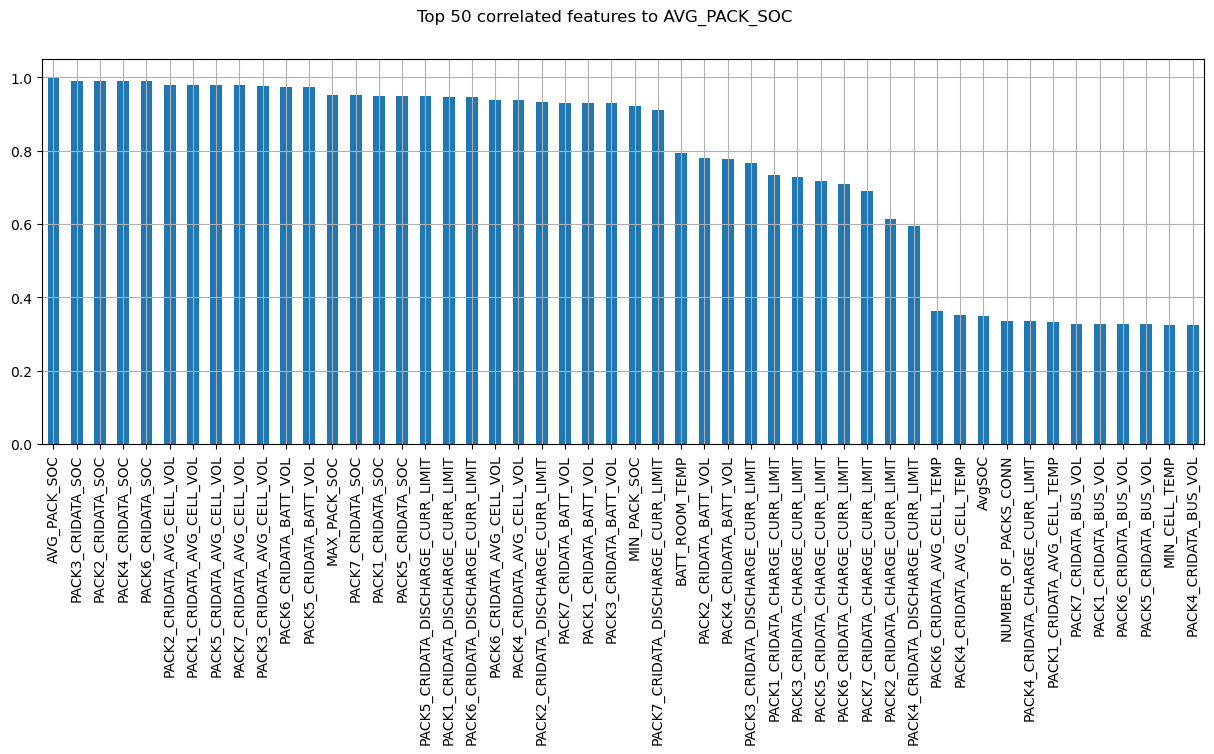

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
correlation_matrix["AVG_PACK_SOC"].abs().sort_values(ascending=False)[:50].plot.bar()
plt.xlabel('', fontsize=64)
plt.ylabel('', fontsize=64)
plt.grid(True)
plt.suptitle("Top 50 correlated features to AVG_PACK_SOC")

Text(0.5, 0.98, 'Time x AVG_PACK_SOC')

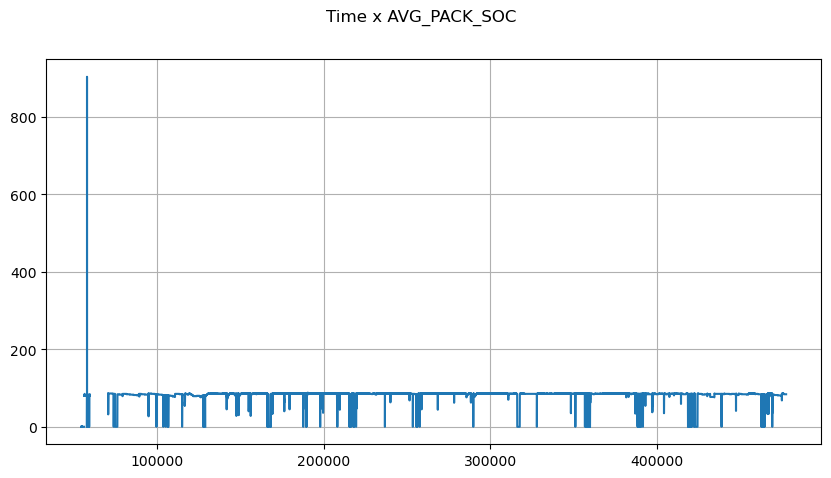

In [12]:
plt.figure(figsize=(10, 5))
df["AVG_PACK_SOC"].plot()
plt.grid(True)
plt.suptitle("Time x AVG_PACK_SOC")
# battery_data["PACK4_CRIDATA_SOC"].plot()
# battery_data["PACK3_CRIDATA_SOC"].plot()
# battery_data["PACK2_CRIDATA_AVG_CELL_VOL"].plot()

Text(0.5, 0.98, 'Time x AVG_PACK_SOC (Zoom)')

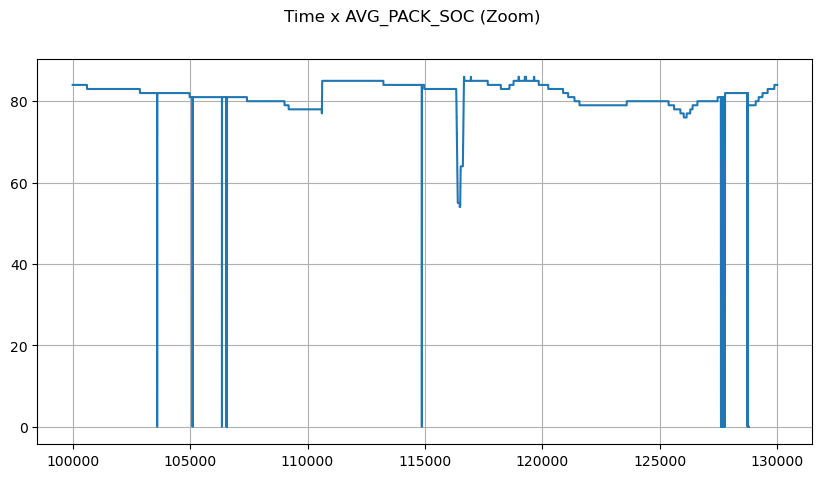

In [13]:
plt.figure(figsize=(10, 5))
df.loc[100000:130000, "AVG_PACK_SOC"].plot()
plt.grid(True)
plt.suptitle("Time x AVG_PACK_SOC (Zoom)")

Text(0.5, 0.98, 'Time x AVG_PACK_SOC (Zoom)')

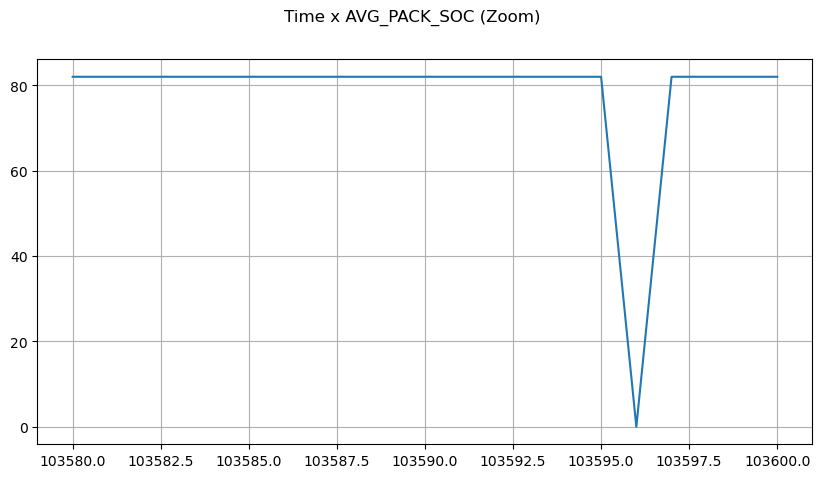

In [16]:
plt.figure(figsize=(10, 5))
df.loc[103580:103600, "AVG_PACK_SOC"].plot()
plt.grid(True)
plt.suptitle("Time x AVG_PACK_SOC (Zoom)")

In [17]:
df.head()

time  AVG_PACK_SOC  AvgSOC  AvgSOH BATT_PACK_1_DISCONN  \
0  2022-08-30T00:00:00Z           NaN    77.0   100.0                None   
1  2022-08-30T00:01:00Z           NaN    77.0   100.0                None   
2  2022-08-30T00:02:00Z           NaN    77.0   100.0                None   
3  2022-08-30T00:03:00Z           NaN    77.0   100.0                None   
4  2022-08-30T00:04:00Z           NaN    77.0   100.0                None   

  BATT_PACK_1_FAULT BATT_PACK_1_WARN BATT_PACK_2_DISCONN BATT_PACK_2_FAULT  \
0              None             None                None              None   
1              None             None                None              None   
2              None             None                None              None   
3              None             None                None              None   
4              None             None                None              None   

  BATT_PACK_2_WARN  ... PACK_1_STATUS PACK_2_STATUS PACK_3_STATUS  \
0             None  ...           NaN           NaN           NaN   
1             None  ...           NaN           NaN           NaN   
2             None  ...           NaN           NaN           NaN   
3             None  ...           NaN           NaN           NaN   
4             None  ...           NaN           NaN           NaN   

  PACK_4_STATUS PACK_5_STATUS PACK_6_STATUS PACK_7_STATUS RunningState  \
0           NaN           NaN           NaN           NaN         True   
1           NaN           NaN           NaN           NaN         True   
2           NaN           NaN           NaN           NaN         True   
3           NaN           NaN           NaN           NaN         True   
4           NaN           NaN           NaN           NaN         True   

  Voltage       valuestreamname  
0   900.0  ISS.Onshore.Model.VS  
1   900.0  ISS.Onshore.Model.VS  
2   900.0  ISS.Onshore.Model.VS  
3   900.0  ISS.Onshore.Model.VS  
4   900.0  ISS.Onshore.Model.VS  

[5 rows x 110 columns]

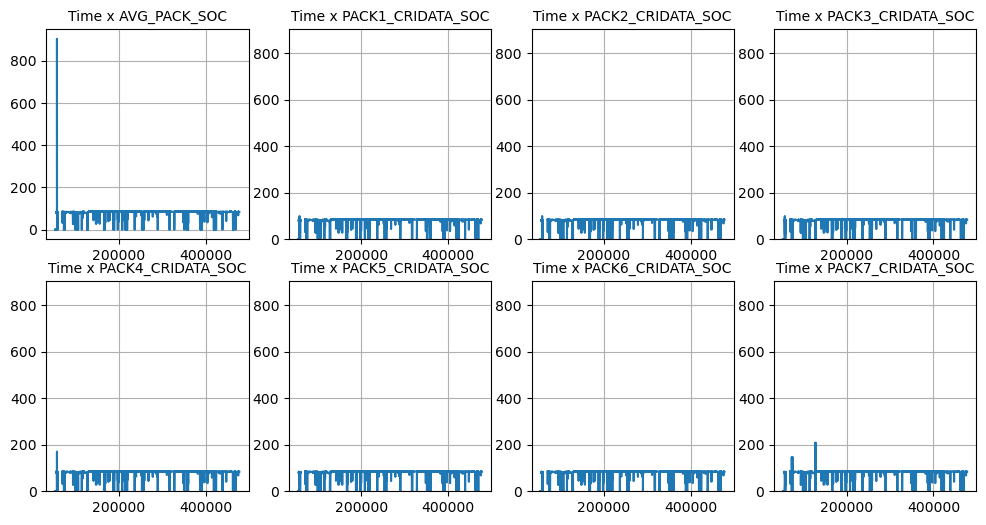

In [22]:
ymin = 0
ymax = df["AVG_PACK_SOC"].max()

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i == 0:
        ax.plot(df["AVG_PACK_SOC"])
        ax.grid(True)
        ax.set_title("Time x AVG_PACK_SOC", fontsize=10)
    else:
        ax.plot(df[f"PACK{i}_CRIDATA_SOC"])
        ax.grid(True)
        ax.set_title(f"Time x PACK{i}_CRIDATA_SOC", fontsize=10)
        ax.set_ylim([ymin, ymax])

<AxesSubplot: >

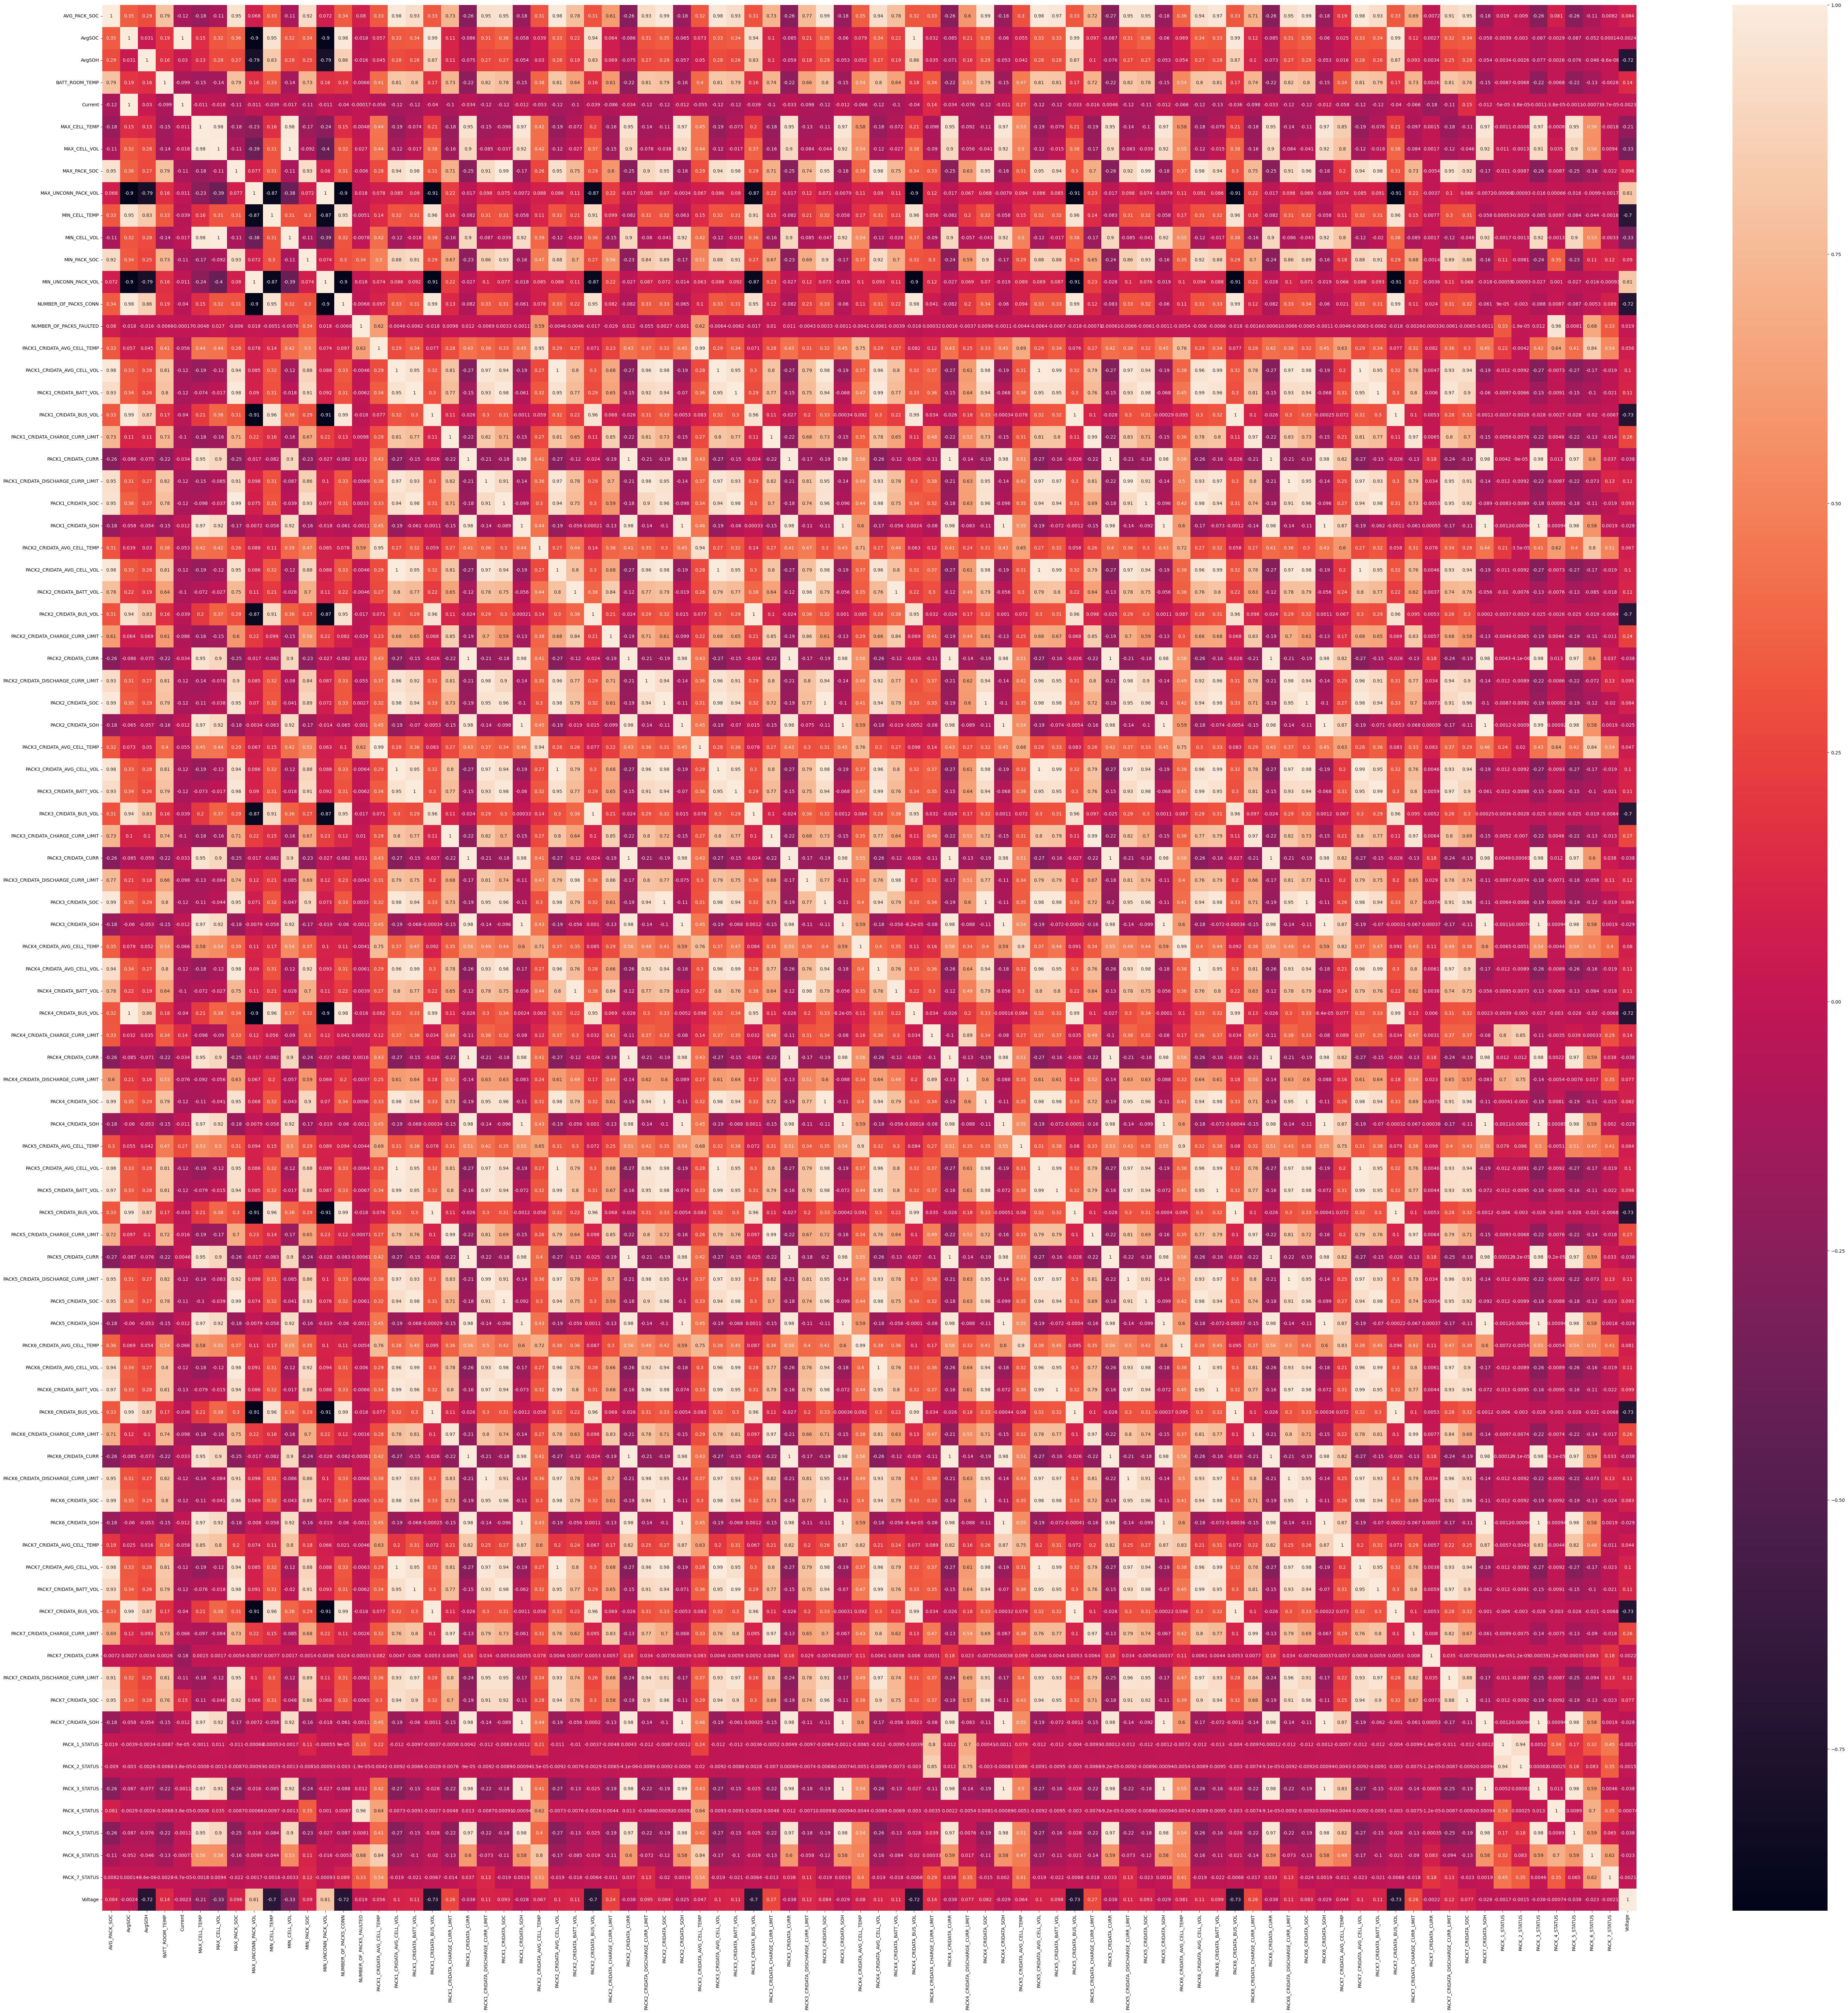

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(75,75))         # Sample figsize in inches
sns.heatmap(correlation_matrix, annot=True, ax=ax)

In [24]:
# correlation_matrix["AVG_PACK_SOC"].loc[
#    ["PACK7_CRIDATA_AVG_CELL_TEMP",
#     "PACK7_CRIDATA_AVG_CELL_VOL",
#     "PACK7_CRIDATA_BATT_VOL",
#     "PACK7_CRIDATA_BUS_VOL",
#     "PACK7_CRIDATA_CHARGE_CURR_LIMIT",
#     "PACK7_CRIDATA_CURR",
#     "PACK7_CRIDATA_DISCHARGE_CURR_LIMIT",
#     "PACK7_CRIDATA_SOC",
#     "PACK7_CRIDATA_SOH"]
# ]

CRIDATA_COLUMNS = [
    "CRIDATA_AVG_CELL_TEMP",
    "CRIDATA_AVG_CELL_VOL",
    "CRIDATA_BATT_VOL",
    "CRIDATA_BUS_VOL",
    "CRIDATA_CHARGE_CURR_LIMIT",
    "CRIDATA_CURR",
    "CRIDATA_DISCHARGE_CURR_LIMIT",
    "CRIDATA_SOC",
    "CRIDATA_SOH"
]

# Create 7 plots with 9 bars each for the CRIDATA
# plt.figure(figsize=(15, 5))
# correlation_matrix["AVG_PACK_SOC"].abs().sort_values(ascending=False)[:50].plot.bar()
# plt.xlabel('', fontsize=64)
# plt.ylabel('', fontsize=64)
# plt.grid(True)
# plt.suptitle("Top 50 correlated features to AVG_PACK_SOC")



/tmp/ipykernel_2037/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_2037/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_2037/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_2037/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_2037/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_2037/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_2037/2835726511.py:13: UserWarning: F

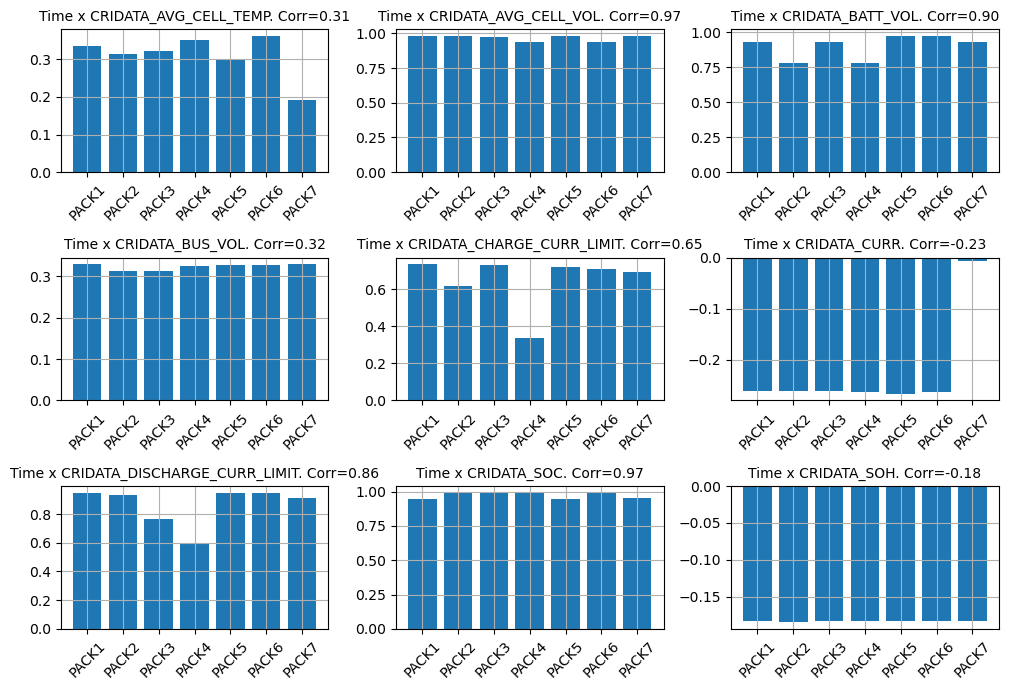

In [25]:
num_packs = 7
fig, axes = plt.subplots(3, 3, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    cridata_to_plot = CRIDATA_COLUMNS[i]
    columns_to_plot = []
    for j in range(1, num_packs+1):
        columns_to_plot.append(f"PACK{j}_" + cridata_to_plot)
    xlabels = ["PACK"+str(k) for k in range(1, 8)]
    data_to_plot = correlation_matrix["AVG_PACK_SOC"].loc[columns_to_plot]
    ax.bar(data_to_plot.index, data_to_plot.values)
    ax.grid(True)
    ax.set_title(f"Time x {cridata_to_plot}. Corr={data_to_plot.mean():.2f}", fontsize=10)
    ax.set_xticklabels(xlabels, rotation = 45)
    plt.tight_layout()

(-154.875, 471.0)

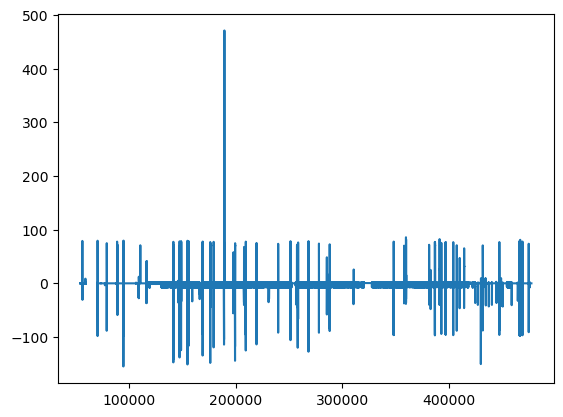

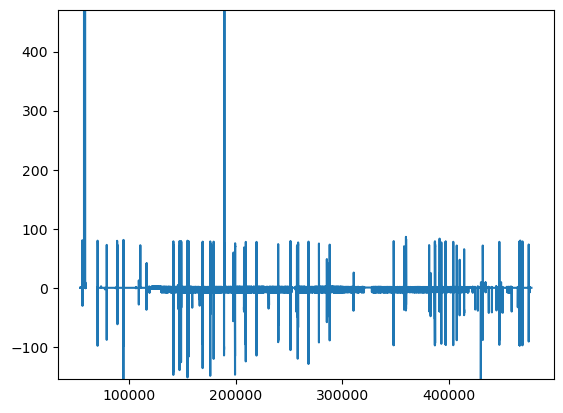

In [30]:
ymin = df["PACK7_CRIDATA_CURR"].min()
ymax = df["PACK7_CRIDATA_CURR"].max()

df["PACK7_CRIDATA_CURR"].plot()

plt.figure()
df["PACK2_CRIDATA_CURR"].plot()
ax = plt.gca()
ax.set_ylim([ymin, ymax])

<AxesSubplot: >

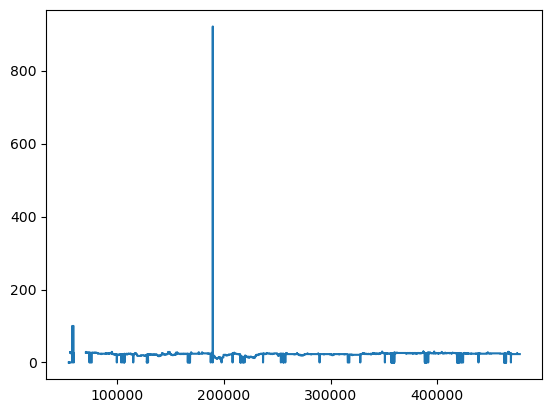

In [27]:
df["PACK6_CRIDATA_AVG_CELL_TEMP"].plot()

# Fault analysis

In [31]:
# Columns datatypes
string_columns = df.select_dtypes('object').columns.tolist()
print("Object Columns",string_columns)

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns ",numeric_columns)

print(len(string_columns))
print(len(numeric_columns))

Object Columns ['time', 'BATT_PACK_1_DISCONN', 'BATT_PACK_1_FAULT', 'BATT_PACK_1_WARN', 'BATT_PACK_2_DISCONN', 'BATT_PACK_2_FAULT', 'BATT_PACK_2_WARN', 'BATT_PACK_3_DISCONN', 'BATT_PACK_3_FAULT', 'BATT_PACK_3_WARN', 'BATT_PACK_4_DISCONN', 'BATT_PACK_4_FAULT', 'BATT_PACK_4_WARN', 'BATT_PACK_5_DISCONN', 'BATT_PACK_5_FAULT', 'BATT_PACK_5_WARN', 'BATT_PACK_6_DISCONN', 'BATT_PACK_6_FAULT', 'BATT_PACK_6_WARN', 'BATT_PACK_7_DISCONN', 'BATT_PACK_7_FAULT', 'BATT_PACK_7_WARN', 'RunningState', 'valuestreamname']
Numerical columns  ['AVG_PACK_SOC', 'AvgSOC', 'AvgSOH', 'BATT_ROOM_TEMP', 'Current', 'MAX_CELL_TEMP', 'MAX_CELL_VOL', 'MAX_PACK_SOC', 'MAX_UNCONN_PACK_VOL', 'MIN_CELL_TEMP', 'MIN_CELL_VOL', 'MIN_PACK_SOC', 'MIN_UNCONN_PACK_VOL', 'NUMBER_OF_PACKS_CONN', 'NUMBER_OF_PACKS_FAULTED', 'PACK1_CRIDATA_AVG_CELL_TEMP', 'PACK1_CRIDATA_AVG_CELL_VOL', 'PACK1_CRIDATA_BATT_VOL', 'PACK1_CRIDATA_BUS_VOL', 'PACK1_CRIDATA_CHARGE_CURR_LIMIT', 'PACK1_CRIDATA_CURR', 'PACK1_CRIDATA_DISCHARGE_CURR_LIMIT', 'PACK1

In [32]:
PACK_SUFFIX = ("FAULT")
ALL_SUFFIXES = ("FAULT", "FAULTED")
PACK_FAULT_COLUMNS = df.columns[df.columns.str.endswith(PACK_SUFFIX)]
NUMBER_OF_PACKS_FAULTED = df["NUMBER_OF_PACKS_FAULTED"]

PACK1TO5_FAULT_COLUMNS = PACK_FAULT_COLUMNS.copy()
PACK1TO5_FAULT_COLUMNS = PACK1TO5_FAULT_COLUMNS.drop(["BATT_PACK_6_FAULT", "BATT_PACK_7_FAULT"])
PACK1TO5_FAULT_COLUMNS = list(PACK1TO5_FAULT_COLUMNS)
PACK1TO5_FAULT_COLUMNS.append("NUMBER_OF_PACKS_FAULTED")
ALL_FAULT_COLUMNS = df.columns[df.columns.str.endswith(ALL_SUFFIXES)]

In [94]:
# df_fault[(df_fault[PACK_FAULT_COLUMNS]>0) & (not np.isnan(df[ALL_FAULT_COLUMNS]))]
non_nan = df[~df.isnull().any(axis=1)] 
# non_nan
non_nan[non_nan[PACK_FAULT_COLUMNS]>0]

time  AVG_PACK_SOC  AvgSOC  AvgSOH BATT_PACK_1_DISCONN  \
56023   NaN           NaN     NaN     NaN                 NaN   
56024   NaN           NaN     NaN     NaN                 NaN   
56027   NaN           NaN     NaN     NaN                 NaN   
56028   NaN           NaN     NaN     NaN                 NaN   
56052   NaN           NaN     NaN     NaN                 NaN   
...     ...           ...     ...     ...                 ...   
477581  NaN           NaN     NaN     NaN                 NaN   
477582  NaN           NaN     NaN     NaN                 NaN   
477583  NaN           NaN     NaN     NaN                 NaN   
477584  NaN           NaN     NaN     NaN                 NaN   
477585  NaN           NaN     NaN     NaN                 NaN   

       BATT_PACK_1_FAULT BATT_PACK_1_WARN BATT_PACK_2_DISCONN  \
56023                NaN              NaN                 NaN   
56024                NaN              NaN                 NaN   
56027                NaN              NaN                 NaN   
56028                NaN              NaN                 NaN   
56052                NaN              NaN                 NaN   
...                  ...              ...                 ...   
477581               NaN              NaN                 NaN   
477582               NaN              NaN                 NaN   
477583               NaN              NaN                 NaN   
477584               NaN              NaN                 NaN   
477585               NaN              NaN                 NaN   

       BATT_PACK_2_FAULT BATT_PACK_2_WARN  ... PACK_1_STATUS PACK_2_STATUS  \
56023                NaN              NaN  ...           NaN           NaN   
56024                NaN              NaN  ...           NaN           NaN   
56027                NaN              NaN  ...           NaN           NaN   
56028                NaN              NaN  ...           NaN           NaN   
56052                NaN              NaN  ...           NaN           NaN   
...                  ...              ...  ...           ...           ...   
477581               NaN              NaN  ...           NaN           NaN   
477582               NaN              NaN  ...           NaN           NaN   
477583               NaN              NaN  ...           NaN           NaN   
477584               NaN              NaN  ...           NaN           NaN   
477585               NaN              NaN  ...           NaN           NaN   

       PACK_3_STATUS PACK_4_STATUS PACK_5_STATUS PACK_6_STATUS PACK_7_STATUS  \
56023            NaN           NaN           NaN           NaN           NaN   
56024            NaN           NaN           NaN           NaN           NaN   
56027            NaN           NaN           NaN           NaN           NaN   
56028            NaN           NaN           NaN           NaN           NaN   
56052            NaN           NaN           NaN           NaN           NaN   
...              ...           ...           ...           ...           ...   
477581           NaN           NaN           NaN           NaN           NaN   
477582           NaN           NaN           NaN           NaN           NaN   
477583           NaN           NaN           NaN           NaN           NaN   
477584           NaN           NaN           NaN           NaN           NaN   
477585           NaN           NaN           NaN           NaN           NaN   

       RunningState Voltage valuestreamname  
56023           NaN     NaN             NaN  
56024           NaN     NaN             NaN  
56027           NaN     NaN             NaN  
56028           NaN     NaN             NaN  
56052           NaN     NaN             NaN  
...             ...     ...             ...  
477581          NaN     NaN             NaN  
477582          NaN     NaN             NaN  
477583          NaN     NaN             NaN  
477584          NaN     NaN             NaN  
477585          NaN     NaN             N

In [95]:
non_nan[non_nan["NUMBER_OF_PACKS_FAULTED"]>0]

time  AVG_PACK_SOC    AvgSOC  AvgSOH  \
57770   2022-10-19T06:29:00Z         904.0   2.11487     0.0   
88874   2022-11-10T00:06:00Z          85.0  85.00000   100.0   
88875   2022-11-10T00:07:00Z          85.0  85.00000   100.0   
88876   2022-11-10T00:08:00Z          85.0  85.00000   100.0   
88877   2022-11-10T00:09:00Z          84.0  84.00000   100.0   
...                      ...           ...       ...     ...   
114960  2022-11-28T02:52:00Z          84.0   0.00000     0.0   
114961  2022-11-28T02:53:00Z          84.0   0.00000     0.0   
114962  2022-11-28T02:54:00Z          84.0   0.00000     0.0   
114963  2022-11-28T02:55:00Z          84.0   0.00000     0.0   
116395  2022-11-29T02:47:00Z          55.0  55.00000   100.0   

       BATT_PACK_1_DISCONN BATT_PACK_1_FAULT BATT_PACK_1_WARN  \
57770                 True             False            False   
88874                 True             False            False   
88875                 True             False            False   
88876                 True             False            False   
88877                 True             False            False   
...                    ...               ...              ...   
114960                True             False            False   
114961                True             False            False   
114962                True             False            False   
114963                True             False            False   
116395                True             False             True   

       BATT_PACK_2_DISCONN BATT_PACK_2_FAULT BATT_PACK_2_WARN  ...  \
57770                False              True            False  ...   
88874                False             False            False  ...   
88875                False             False            False  ...   
88876                False             False            False  ...   
88877                False             False            False  ...   
...                    ...               ...              ...  ...   
114960                True              True            False  ...   
114961                True              True            False  ...   
114962                True              True            False  ...   
114963                True             False            False  ...   
116395                True             False            False  ...   

       PACK_1_STATUS PACK_2_STATUS PACK_3_STATUS PACK_4_STATUS PACK_5_STATUS  \
57770          100.0           0.0         384.0         471.0          24.0   
88874            0.0           0.0           0.0           0.0           0.0   
88875            0.0           0.0           0.0           0.0           0.0   
88876            0.0           0.0           0.0           0.0           0.0   
88877            0.0           0.0           0.0           0.0           0.0   
...              ...           ...           ...           ...           ...   
114960           0.0           0.0           0.0           0.0           0.0   
114961           0.0           0.0           0.0           0.0           0.0   
114962           0.0           0.0           0.0           0.0           0.0   
114963           0.0           0.0           0.0           0.0           0.0   
116395           0.0           0.0           0.0           0.0           0.0   

       PACK_6_STATUS PACK_7_STATUS RunningState Voltage       valuestreamname  
57770         3964.0         904.0        False  1022.5  ISS.Onshore.Model.VS  
88874            0.0           0.0         True   918.0  ISS.Onshore.Model.VS  
88875            0.0           0.0         True   914.5  ISS.Onshore.Model.VS  
88876            0.0           0.0         True   911.0  ISS.Onshore.Model.VS  
88877            0.0           0.0         True   909.0  ISS.Onshore.Model.VS  
...              ...           ...          ...     ...                   ...  
114960           0.0           0.0        False  6552.0  ISS.Onshore.Model.VS  
114961           0.0           0

In [96]:
df_fault = non_nan.copy()
df_fault["NUMBER_OF_PACKS_FAULTED"] = df_fault[PACK_FAULT_COLUMNS].sum(axis=1)
df_fault['FAULT'] = df_fault[PACK_FAULT_COLUMNS].apply(lambda row: 1 if any(row) else 0, axis=1)
df_fault[ALL_FAULT_COLUMNS] = df_fault[ALL_FAULT_COLUMNS].fillna(np.NaN)

In [97]:
# Create a column FAULT that has value 0 when all the packs are working properly and 1 when at least one pack is faulted
# Assuming you have a DataFrame named 'df' with columns 'col1' to 'col6'
df_fault['FAULT'] = df_fault[PACK_FAULT_COLUMNS].apply(lambda row: 1 if any(row) else 0, axis=1)

In [98]:
IDX = 0
df_fault.iloc[df_fault[df_fault["FAULT"]==1].index[IDX]:df_fault[df_fault["FAULT"]==1].index[IDX]+20][ALL_FAULT_COLUMNS]

BATT_PACK_1_FAULT  BATT_PACK_2_FAULT  BATT_PACK_3_FAULT  \
127669              False              False              False   
127670              False              False              False   
127671              False              False              False   
127672              False              False              False   
127673              False              False              False   
127674              False              False              False   
127675              False              False              False   
127676              False              False              False   
127677               True              False              False   
127678              False              False              False   
127679              False              False              False   
127680              False              False              False   
127681              False              False              False   
127682              False              False              False   
127683              False              False              False   
127684              False              False              False   
127685              False              False              False   
127686              False              False              False   
127687              False              False              False   
127688              False              False              False   

        BATT_PACK_4_FAULT  BATT_PACK_5_FAULT  BATT_PACK_6_FAULT  \
127669              False              False              False   
127670              False              False              False   
127671              False              False              False   
127672              False              False              False   
127673              False              False              False   
127674              False              False              False   
127675              False              False              False   
127676              False              False              False   
127677              False              False              False   
127678              False              False              False   
127679              False              False              False   
127680              False              False              False   
127681              False              False              False   
127682              False              False              False   
127683              False              False              False   
127684              False              False              False   
127685              False              False              False   
127686              False              False              False   
127687              False              False              False   
127688              False              False              False   

        BATT_PACK_7_FAULT  NUMBER_OF_PACKS_FAULTED  
127669              False                      0.0  
127670              False                      0.0  
127671              False                      0.0  
127672              False                      0.0  
127673              False                      0.0  
127674              False                      0.0  
127675              False                      0.0  
127676              False                      0.0  
127677              False                      1.0  
127678              False                      0.0  
127679              False                      0.0  
127680              False                      0.0  
127681              False                      0.0  
127682              False                      0.0  
127683              False                      0.0  
127684              False                      0.0  
127685              False                      0.0  
127686              False                      0.0  
127687              False                      0.0  
127688              False                      0.0

## Analyze packs individually

### Numerical columns

In [99]:
df_numeric = df_fault[numeric_columns].copy()
df_numeric

AVG_PACK_SOC  AvgSOC  AvgSOH  BATT_ROOM_TEMP    Current  \
56023           81.0    80.0   100.0       22.531250  -3.950010   
56024           81.0    80.0   100.0       22.531250  -3.950010   
56027           81.0    80.0   100.0       23.031250   1.199950   
56028           81.0    80.0   100.0       23.031250   1.199950   
56052           80.0    80.0   100.0       22.937500  54.149948   
...              ...     ...     ...             ...        ...   
477581          84.0     0.0     0.0       20.953125   0.000000   
477582          84.0     0.0     0.0       21.093750   0.000000   
477583          84.0     0.0     0.0       21.156250   0.000000   
477584          84.0     0.0     0.0       21.046875   0.000000   
477585          84.0     0.0     0.0       20.859375   0.000000   

        MAX_CELL_TEMP  MAX_CELL_VOL  MAX_PACK_SOC  MAX_UNCONN_PACK_VOL  \
56023            31.0      3.998047          81.0                  0.0   
56024            31.0      3.998047          81.0                  0.0   
56027            31.0      4.000000          81.0                  0.0   
56028            31.0      4.000000          81.0                  0.0   
56052            31.0      3.990234          81.0                909.0   
...               ...           ...           ...                  ...   
477581            0.0      0.000000          84.0                914.0   
477582            0.0      0.000000          84.0                914.0   
477583            0.0      0.000000          84.0                914.0   
477584            0.0      0.000000          84.0                914.0   
477585            0.0      0.000000          84.0                914.0   

        MIN_CELL_TEMP  ...  PACK7_CRIDATA_SOC  PACK7_CRIDATA_SOH  \
56023            25.0  ...               81.0              100.0   
56024            25.0  ...               81.0              100.0   
56027            24.0  ...               81.0              100.0   
56028            24.0  ...               81.0              100.0   
56052            24.0  ...               80.0              100.0   
...               ...  ...                ...                ...   
477581            0.0  ...               84.0              100.0   
477582            0.0  ...               84.0              100.0   
477583            0.0  ...               84.0              100.0   
477584            0.0  ...               84.0              100.0   
477585            0.0  ...               84.0              100.0   

        PACK_1_STATUS  PACK_2_STATUS  PACK_3_STATUS  PACK_4_STATUS  \
56023             0.0            0.0            0.0            0.0   
56024             0.0            0.0            0.0            0.0   
56027             0.0            0.0            0.0            0.0   
56028             0.0            0.0            0.0            0.0   
56052             0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
477581            0.0            0.0            0.0            0.0   
477582            0.0            0.0            0.0            0.0   
477583            0.0            0.0            0.0            0.0   
477584            0.0            0.0            0.0            0.0   
477585            0.0            0.0            0.0            0.0   

        PACK_5_STATUS  PACK_6_STATUS  PACK_7_STATUS  Voltage  
56023             0.0            0.0            0.0    909.0  
56024             0.0            0.0            0.0    909.0  
56027             0.0            0.0            0.0    909.0  
56028             0.0            0.0            0.0    909.0  
56052             0.0            0.0            0.0    907.0  
...               ...            ...            ...      ...  
477581            0.0            0.0            0.0   6552.0  
477582            0.0            0.0            0.0   6552.0  
477583            0.0            0.0            0.0   6552.0  
477584            0.0     

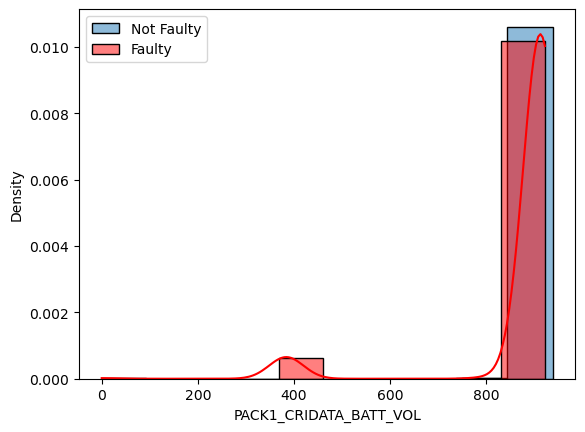

In [100]:
# Let's look at CRIDATA_BATT_VOL
PACK = "PACK1"
COLUMN = f"{PACK}_CRIDATA_BATT_VOL"

plt.figure()
non_faulty_data = df_fault[df_fault['FAULT']==0][COLUMN]
faulty_data = df_fault[df_fault['FAULT']==1][COLUMN]

sns.histplot(non_faulty_data.dropna(), label="Not Faulty", kde=True, stat='density', bins=10)
sns.histplot(faulty_data.dropna(), label="Faulty", color="red", kde=True, stat='density', bins=10)
plt.legend()

ax.set_xlabel(COLUMN)

plt.show()

In [101]:
PACK = "PACK1"
mask = df_fault.columns.str.startswith(f"{PACK}_CRIDATA")
cridata_columns = df_fault.columns[mask]
cridata_columns

CRIDATA_COLUMNS = [
    "CRIDATA_AVG_CELL_TEMP",
    "CRIDATA_AVG_CELL_VOL",
    "CRIDATA_BATT_VOL",
    "CRIDATA_BUS_VOL",
    "CRIDATA_CHARGE_CURR_LIMIT",
    "CRIDATA_CURR",
    "CRIDATA_DISCHARGE_CURR_LIMIT",
    "CRIDATA_SOC",
    "CRIDATA_SOH"
]

In [102]:
non_faulty_data = df_fault[df_fault['FAULT']==0][COLUMN]
faulty_data = df_fault[df_fault['FAULT']==1][COLUMN]

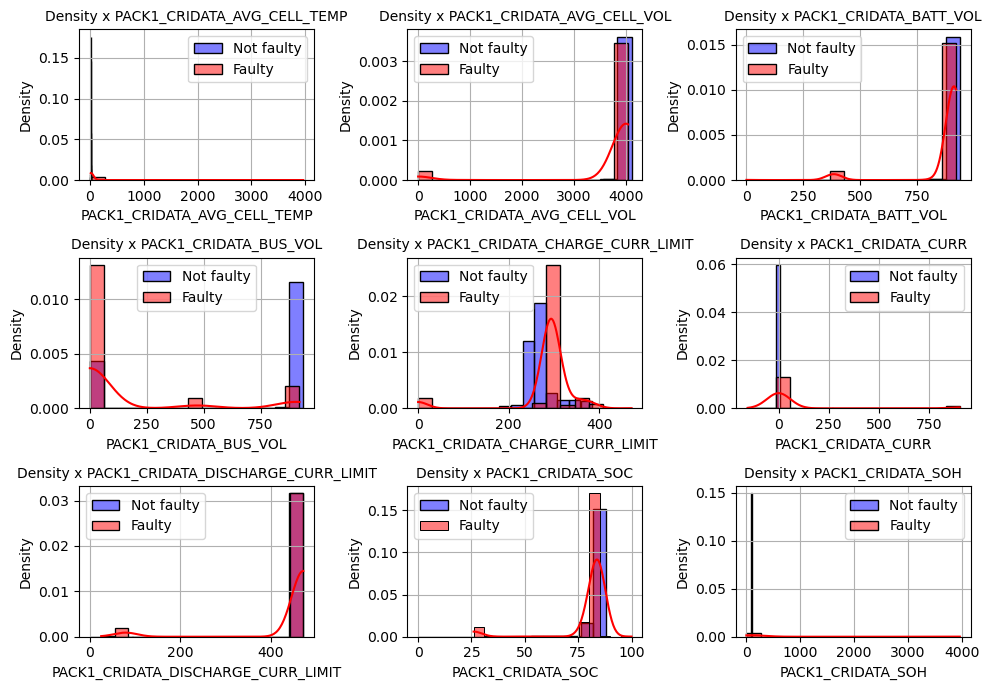

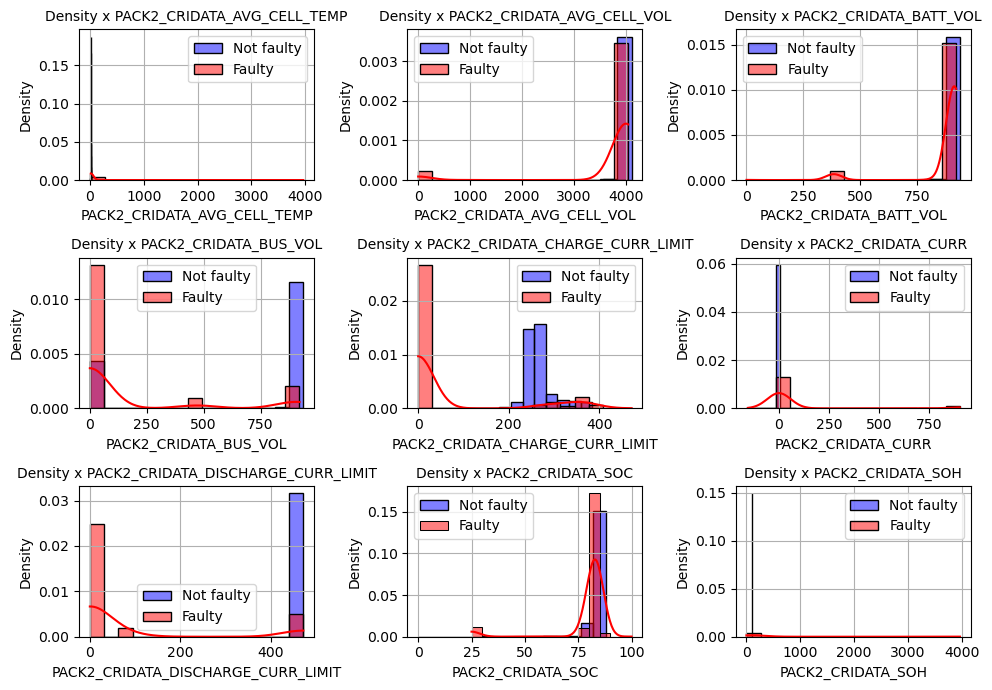

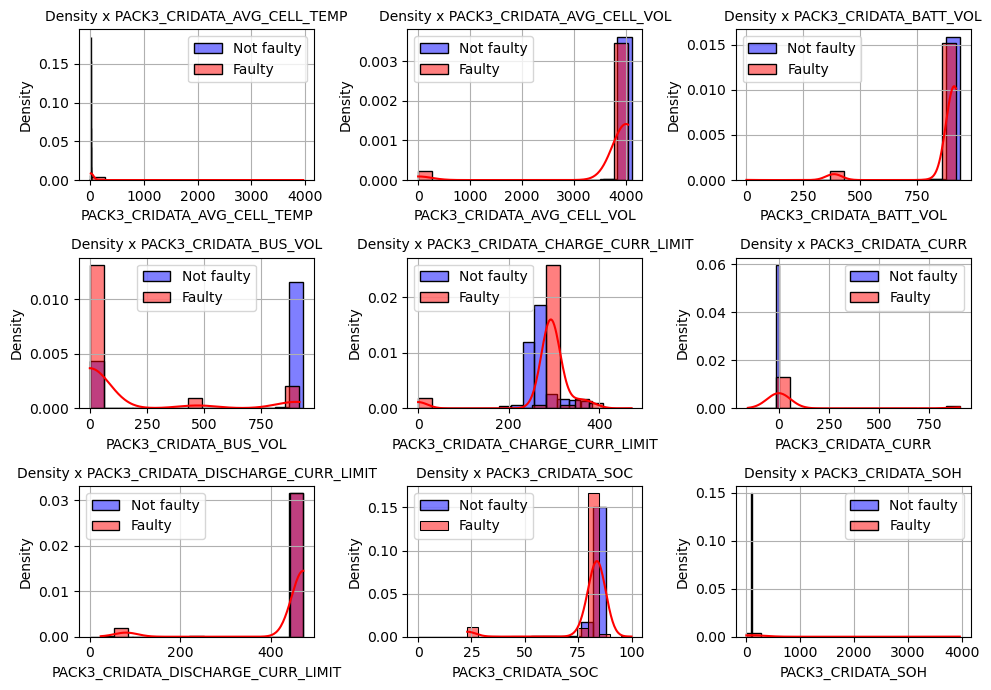

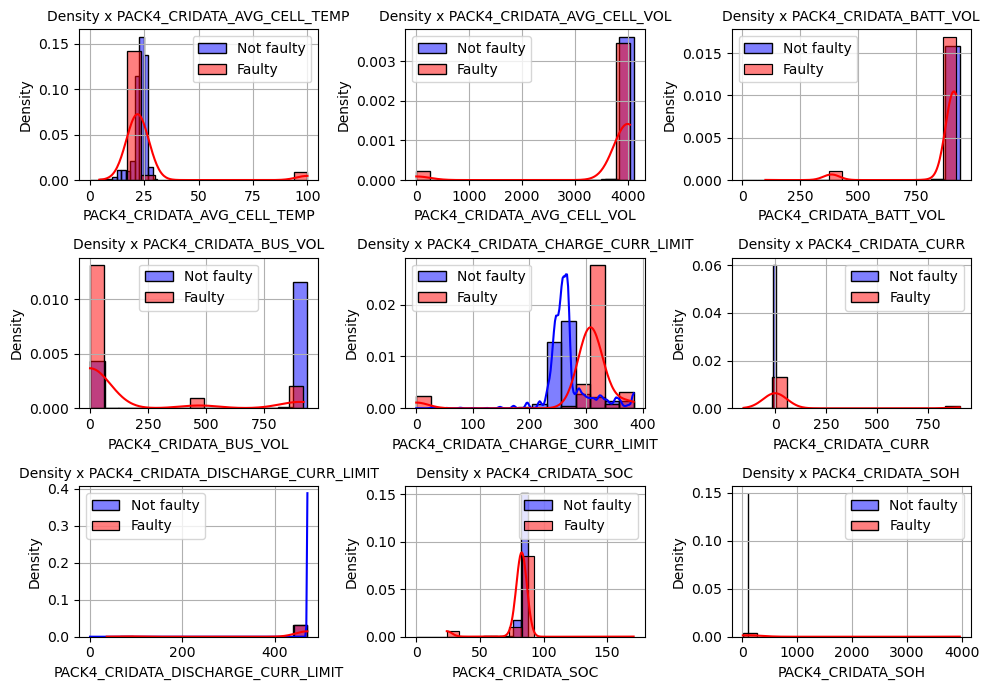

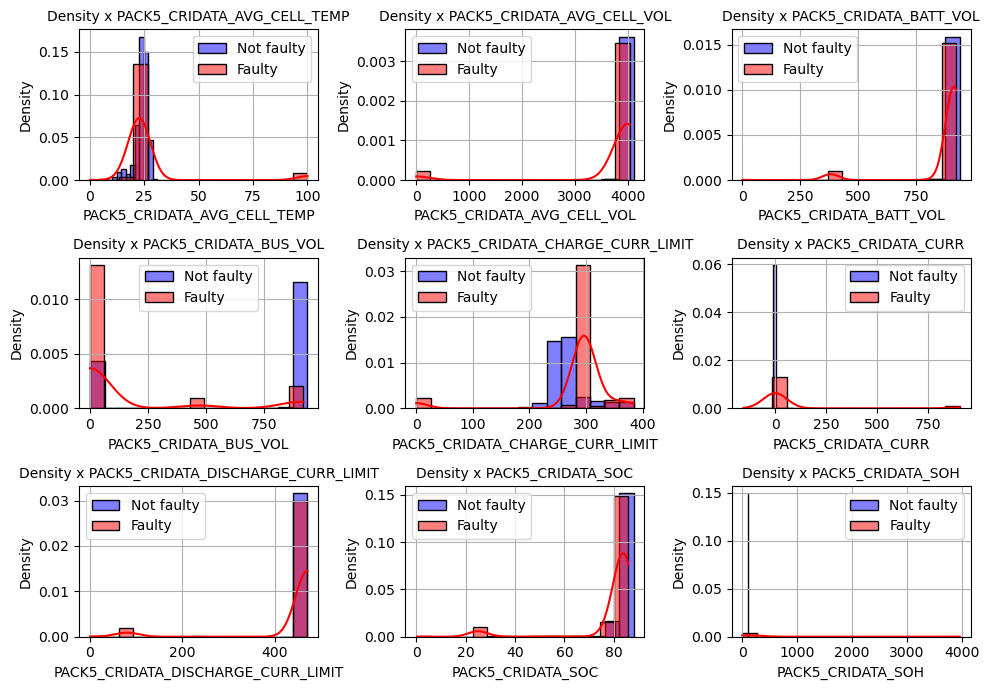

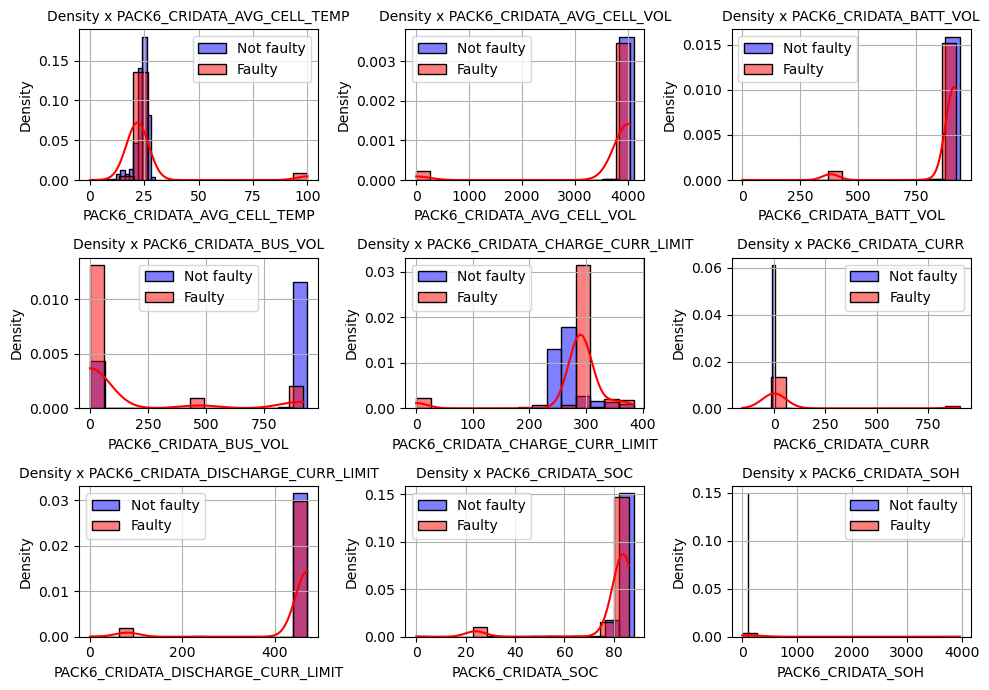

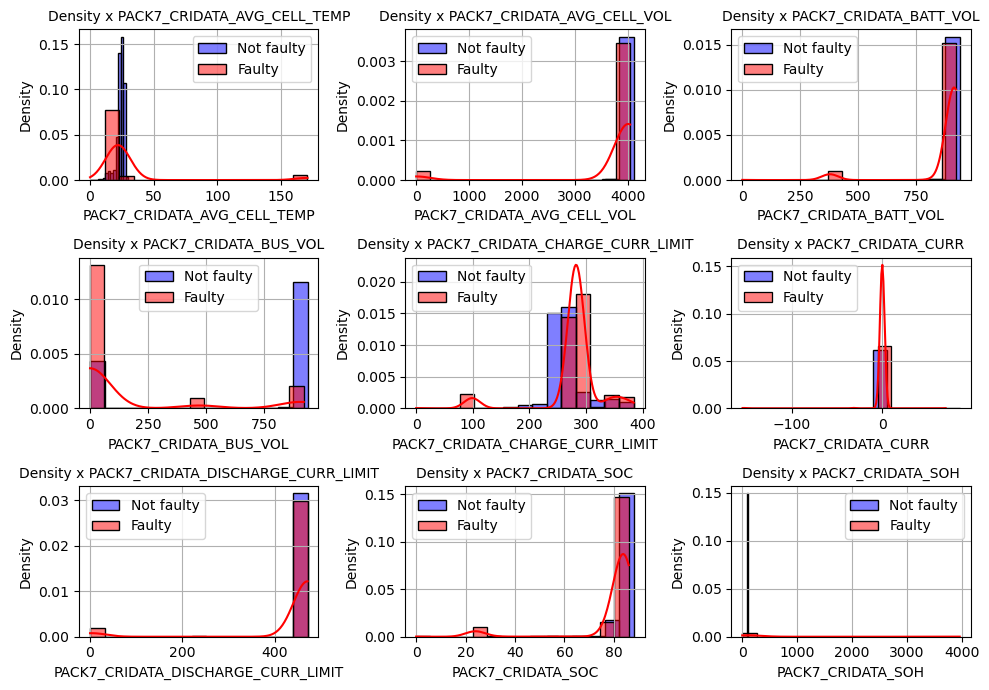

In [103]:
all_non_faulty_data = []
all_faulty_data = []

num_packs = 7
for pack_num in range(1, num_packs+1):
    fig, axes = plt.subplots(3, 3, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        column_to_plot = f"PACK{pack_num}_" + CRIDATA_COLUMNS[i]
        
        non_faulty_data = df_fault[df_fault['FAULT']==0][column_to_plot]
        faulty_data = df_fault[df_fault['FAULT']==1][column_to_plot]

        all_non_faulty_data.append(non_faulty_data)
        all_faulty_data.append(faulty_data)

        sns.histplot(non_faulty_data.dropna(), color="blue", label="Not faulty", kde=True, stat='density', bins=15, ax=ax)
        sns.histplot(faulty_data.dropna(), color="red", label="Faulty", kde=True, stat='density', bins=15, ax=ax)

        ax.set_xlabel(column_to_plot)
        ax.grid(True)
        ax.set_title(f"Density x {column_to_plot}", fontsize=10)
        ax.legend()
    plt.tight_layout()

In [104]:
non_faulty_data = pd.concat(all_non_faulty_data, axis=1)
faulty_data = pd.concat(all_faulty_data, axis=1)

In [105]:
CRIDATA_COLUMNS = [
    "CRIDATA_AVG_CELL_TEMP",
    "CRIDATA_AVG_CELL_VOL",
    "CRIDATA_BATT_VOL",
    "CRIDATA_BUS_VOL",
    "CRIDATA_CHARGE_CURR_LIMIT",
    "CRIDATA_CURR",
    "CRIDATA_DISCHARGE_CURR_LIMIT",
    "CRIDATA_SOC",
    "CRIDATA_SOH"
]

non_faulty_cridata_avg_cell_temp_data_columns = non_faulty_data.columns.str.endswith("CRIDATA_AVG_CELL_TEMP")
non_faulty_cridata_avg_cell_vol_columns = non_faulty_data.columns.str.endswith("CRIDATA_AVG_CELL_VOL")
non_faulty_cridata_batt_vol_columns = non_faulty_data.columns.str.endswith("CRIDATA_BATT_VOL")
non_faulty_cridata_bus_vol_columns = non_faulty_data.columns.str.endswith("CRIDATA_BUS_VOL")
non_faulty_cridata_charge_curr_limit_columns = non_faulty_data.columns.str.endswith("CRIDATA_CHARGE_CURR_LIMIT")
non_faulty_cridata_curr_columns = non_faulty_data.columns.str.endswith("CRIDATA_CURR")
non_faulty_cridata_discharge_curr_limit_columns = non_faulty_data.columns.str.endswith("CRIDATA_DISCHARGE_CURR_LIMIT")
non_faulty_cridata_soc_columns = non_faulty_data.columns.str.endswith("CRIDATA_SOC")
non_faulty_cridata_soh_columns = non_faulty_data.columns.str.endswith("CRIDATA_SOH")



faulty_cridata_avg_cell_temp_data_columns = faulty_data.columns.str.endswith("CRIDATA_AVG_CELL_TEMP")
faulty_cridata_avg_cell_vol_columns = faulty_data.columns.str.endswith("CRIDATA_AVG_CELL_VOL")
faulty_cridata_batt_vol_columns = faulty_data.columns.str.endswith("CRIDATA_BATT_VOL")
faulty_cridata_bus_vol_columns = faulty_data.columns.str.endswith("CRIDATA_BUS_VOL")
faulty_cridata_charge_curr_limit_columns = faulty_data.columns.str.endswith("CRIDATA_CHARGE_CURR_LIMIT")
faulty_cridata_curr_columns = faulty_data.columns.str.endswith("CRIDATA_CURR")
faulty_cridata_discharge_curr_limit_columns = faulty_data.columns.str.endswith("CRIDATA_DISCHARGE_CURR_LIMIT")
faulty_cridata_soc_columns = faulty_data.columns.str.endswith("CRIDATA_SOC")
faulty_cridata_soh_columns = faulty_data.columns.str.endswith("CRIDATA_SOH")


non_faulty_cridata_avg_cell_temp_data  = non_faulty_data.loc[:, non_faulty_cridata_avg_cell_temp_data_columns].copy()
non_faulty_cridata_avg_cell_vol = non_faulty_data.loc[:, non_faulty_cridata_avg_cell_vol_columns].copy()
non_faulty_cridata_batt_vol = non_faulty_data.loc[:, non_faulty_cridata_batt_vol_columns].copy()
non_faulty_cridata_bus_vol = non_faulty_data.loc[:, non_faulty_cridata_bus_vol_columns].copy()
non_faulty_cridata_charge_curr_limit = non_faulty_data.loc[:, non_faulty_cridata_charge_curr_limit_columns].copy()
non_faulty_cridata_curr = non_faulty_data.loc[:, non_faulty_cridata_curr_columns].copy()
non_faulty_cridata_discharge_curr_limit = non_faulty_data.loc[:, non_faulty_cridata_discharge_curr_limit_columns].copy()
non_faulty_cridata_soc = non_faulty_data.loc[:, non_faulty_cridata_soc_columns].copy()
non_faulty_cridata_soh = non_faulty_data.loc[:, non_faulty_cridata_soh_columns].copy()

faulty_cridata_avg_cell_temp_data  = faulty_data.loc[:, faulty_cridata_avg_cell_temp_data_columns].copy()
faulty_cridata_avg_cell_vol = faulty_data.loc[:, faulty_cridata_avg_cell_vol_columns].copy()
faulty_cridata_batt_vol = faulty_data.loc[:, faulty_cridata_batt_vol_columns].copy()
faulty_cridata_bus_vol = faulty_data.loc[:, faulty_cridata_bus_vol_columns].copy()
faulty_cridata_charge_curr_limit = faulty_data.loc[:, faulty_cridata_charge_curr_limit_columns].copy()
faulty_cridata_curr = faulty_data.loc[:, faulty_cridata_curr_columns].copy()
faulty_cridata_discharge_curr_limit = faulty_data.loc[:, faulty_cridata_discharge_curr_limit_columns].copy()
faulty_cridata_soc = faulty_data.loc[:, faulty_cridata_soc_columns].copy()
faulty_cridata_soh = faulty_data.loc[:, faulty_cridata_soh_columns].copy()

In [106]:
def compute_descriptive_statistics(df_):
    # Computes the descriptive statistics and then the mean of a column and adds it to the descriptive statistics df
    # For some reason I don't know, I can't simply use the pd.describe() function. It has a bug and the mean always returns NaN, even though the df has no NaNs.
    description = df_.describe()
    for column in df_:
        np_array = df_[column].values
        np_array = np_array[~np.isnan(np_array)]
        description.loc["mean", column] = np_array.mean()
    return description


non_faulty_cridata_avg_cell_temp_data_description = compute_descriptive_statistics(non_faulty_cridata_avg_cell_temp_data)
non_faulty_cridata_avg_cell_vol_description = compute_descriptive_statistics(non_faulty_cridata_avg_cell_vol)
non_faulty_cridata_batt_vol_description = compute_descriptive_statistics(non_faulty_cridata_batt_vol)
non_faulty_cridata_bus_vol_description = compute_descriptive_statistics(non_faulty_cridata_bus_vol)
non_faulty_cridata_charge_curr_limit_description = compute_descriptive_statistics(non_faulty_cridata_charge_curr_limit)
non_faulty_cridata_curr_description = compute_descriptive_statistics(non_faulty_cridata_curr)
non_faulty_cridata_discharge_curr_limit_description = compute_descriptive_statistics(non_faulty_cridata_discharge_curr_limit)
non_faulty_cridata_soc_description = compute_descriptive_statistics(non_faulty_cridata_soc)
non_faulty_cridata_soh_description = compute_descriptive_statistics(non_faulty_cridata_soh)

faulty_cridata_avg_cell_temp_data_description = compute_descriptive_statistics(faulty_cridata_avg_cell_temp_data)
faulty_cridata_avg_cell_vol_description = compute_descriptive_statistics(faulty_cridata_avg_cell_vol)
faulty_cridata_batt_vol_description = compute_descriptive_statistics(faulty_cridata_batt_vol)
faulty_cridata_bus_vol_description = compute_descriptive_statistics(faulty_cridata_bus_vol)
faulty_cridata_charge_curr_limit_description = compute_descriptive_statistics(faulty_cridata_charge_curr_limit)
faulty_cridata_curr_description = compute_descriptive_statistics(faulty_cridata_curr)
faulty_cridata_discharge_curr_limit_description = compute_descriptive_statistics(faulty_cridata_discharge_curr_limit)
faulty_cridata_soc_description = compute_descriptive_statistics(faulty_cridata_soc)
faulty_cridata_soh_description = compute_descriptive_statistics(faulty_cridata_soh)

<AxesSubplot: >

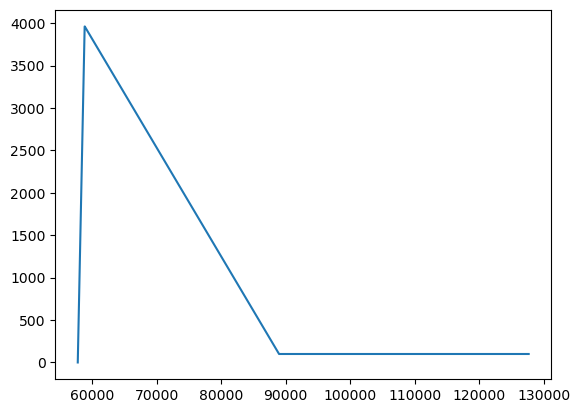

In [107]:
non_faulty_cridata_avg_cell_temp_data
non_faulty_cridata_avg_cell_vol
non_faulty_cridata_batt_vol
non_faulty_cridata_bus_vol
non_faulty_cridata_charge_curr_limit
non_faulty_cridata_curr
non_faulty_cridata_discharge_curr_limit
non_faulty_cridata_soc
non_faulty_cridata_soh

faulty_cridata_avg_cell_temp_data
faulty_cridata_avg_cell_vol
faulty_cridata_batt_vol
faulty_cridata_bus_vol
faulty_cridata_charge_curr_limit
faulty_cridata_curr
faulty_cridata_discharge_curr_limit
faulty_cridata_soc
faulty_cridata_soh["PACK1_CRIDATA_SOH"].plot()

<AxesSubplot: >

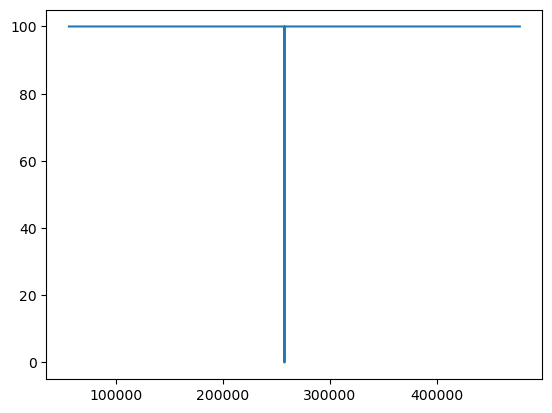

In [108]:
non_faulty_cridata_soh["PACK1_CRIDATA_SOH"].plot()

In [110]:
non_faulty_cridata_soh_description

PACK1_CRIDATA_SOH  PACK2_CRIDATA_SOH  PACK3_CRIDATA_SOH  \
count           329346.0           329346.0           329346.0   
mean               100.0              100.0              100.0   
std                  0.0                0.0                0.0   
min                  0.0                0.0                0.0   
25%                100.0              100.0              100.0   
50%                100.0              100.0              100.0   
75%                100.0              100.0              100.0   
max                100.0              100.0              100.0   

       PACK4_CRIDATA_SOH  PACK5_CRIDATA_SOH  PACK6_CRIDATA_SOH  \
count           329346.0           329346.0           329346.0   
mean               100.0              100.0              100.0   
std                  0.0                0.0                0.0   
min                  0.0                0.0                0.0   
25%                100.0              100.0              100.0   
50%                100.0              100.0              100.0   
75%                100.0              100.0              100.0   
max                100.0              100.0              100.0   

       PACK7_CRIDATA_SOH  
count           329346.0  
mean               100.0  
std                  0.0  
min                  0.0  
25%                100.0  
50%                100.0  
75%                100.0  
max                100.0

In [111]:
faulty_cridata_soh_description

PACK1_CRIDATA_SOH  PACK2_CRIDATA_SOH  PACK3_CRIDATA_SOH  \
count              616.0              616.0              616.0   
mean               325.5              325.5              325.5   
std                  inf                inf                inf   
min                  0.0                0.0                0.0   
25%                100.0              100.0              100.0   
50%                100.0              100.0              100.0   
75%                100.0              100.0              100.0   
max               3960.0             3962.0             3960.0   

       PACK4_CRIDATA_SOH  PACK5_CRIDATA_SOH  PACK6_CRIDATA_SOH  \
count         616.000000              616.0              616.0   
mean          325.750000              325.5              325.5   
std                  inf                inf                inf   
min             6.710938                0.0                0.0   
25%           100.000000              100.0              100.0   
50%           100.000000              100.0              100.0   
75%           100.000000              100.0              100.0   
max          3964.000000             3962.0             3962.0   

       PACK7_CRIDATA_SOH  
count              616.0  
mean               325.5  
std                  inf  
min                  0.0  
25%                100.0  
50%                100.0  
75%                100.0  
max               3962.0

In [113]:
non_faulty_data

PACK1_CRIDATA_AVG_CELL_TEMP  PACK1_CRIDATA_AVG_CELL_VOL  \
56023                          28.0                      3984.0   
56024                          28.0                      3984.0   
56027                          28.0                      3984.0   
56028                          28.0                      3984.0   
56052                          27.0                      3976.0   
...                             ...                         ...   
477581                         22.0                      4004.0   
477582                         22.0                      4004.0   
477583                         22.0                      4004.0   
477584                         22.0                      4004.0   
477585                         22.0                      4004.0   

        PACK1_CRIDATA_BATT_VOL  PACK1_CRIDATA_BUS_VOL  \
56023                    909.0                  909.0   
56024                    909.0                  909.0   
56027                    909.0                  909.0   
56028                    909.0                  909.0   
56052                    907.0                  907.0   
...                        ...                    ...   
477581                   913.0                    0.0   
477582                   913.0                    0.0   
477583                   913.0                    0.0   
477584                   913.0                    0.0   
477585                   913.5                    6.0   

        PACK1_CRIDATA_CHARGE_CURR_LIMIT  PACK1_CRIDATA_CURR  \
56023                             343.0            0.600098   
56024                             343.0            0.600098   
56027                             343.0           -0.099976   
56028                             343.0           -0.099976   
56052                             353.0           -9.101562   
...                                 ...                 ...   
477581                            258.0            0.000000   
477582                            258.0            0.000000   
477583                            258.0            0.000000   
477584                            258.0            0.000000   
477585                            258.0            0.000000   

        PACK1_CRIDATA_DISCHARGE_CURR_LIMIT  PACK1_CRIDATA_SOC  \
56023                                471.0               81.0   
56024                                471.0               81.0   
56027                                471.0               81.0   
56028                                471.0               81.0   
56052                                471.0               80.0   
...                                    ...                ...   
477581                               471.0               84.0   
477582                               471.0               84.0   
477583                               471.0               84.0   
477584                               471.0               84.0   
477585                               471.0               84.0   

        PACK1_CRIDATA_SOH  PACK2_CRIDATA_AVG_CELL_TEMP  ...  \
56023               100.0                         29.0  ...   
56024               100.0                         29.0  ...   
56027               100.0                         28.0  ...   
56028               100.0                         28.0  ...   
56052               100.0                         28.0  ...   
...                   ...                          ...  ...   
477581              100.0                         23.0  ...   
477582              100.0                         23.0  ...   
477583              100.0                         23.0  ...   
477584              100.0                         23.0  ...   
477585              100.0                         23.0  ...   

        PACK6_CRIDATA_SOH  PACK7_CRIDATA_AVG_CELL_TEMP  \
56023               100.0                         28.0   
56024               100.0                         28.0   
56027               100.0                        

In [114]:
faulty_data

PACK1_CRIDATA_AVG_CELL_TEMP  PACK1_CRIDATA_AVG_CELL_VOL  \
57770                        3962.0                       904.0   
58821                         100.0                         0.0   
58822                         100.0                         0.0   
58823                         100.0                         0.0   
58824                         100.0                         0.0   
...                             ...                         ...   
127266                         21.0                      3980.0   
127546                         21.0                      3988.0   
127631                         21.0                      3992.0   
127657                         21.0                      3992.0   
127677                         21.0                      3992.0   

        PACK1_CRIDATA_BATT_VOL  PACK1_CRIDATA_BUS_VOL  \
57770                      0.0                   80.0   
58821                    384.0                  471.0   
58822                    384.0                  471.0   
58823                    384.0                  471.0   
58824                    384.0                  471.0   
...                        ...                    ...   
127266                   908.0                  908.0   
127546                   910.0                  909.0   
127631                   911.0                  910.0   
127657                   911.0                  911.0   
127677                   911.0                  911.0   

        PACK1_CRIDATA_CHARGE_CURR_LIMIT  PACK1_CRIDATA_CURR  \
57770                             471.0          381.000000   
58821                               0.0          904.000000   
58822                               0.0          904.000000   
58823                               0.0          904.000000   
58824                               0.0          904.000000   
...                                 ...                 ...   
127266                            351.0           -0.600098   
127546                            344.0           -0.300049   
127631                            336.0           -0.699707   
127657                            335.0            0.899902   
127677                            333.0            1.000000   

        PACK1_CRIDATA_DISCHARGE_CURR_LIMIT  PACK1_CRIDATA_SOC  \
57770                                 25.0              100.0   
58821                                 79.0               26.0   
58822                                 79.0               26.0   
58823                                 79.0               26.0   
58824                                 79.0               26.0   
...                                    ...                ...   
127266                               471.0               80.0   
127546                               471.0               81.0   
127631                               471.0               81.0   
127657                               471.0               81.0   
127677                               471.0               81.0   

        PACK1_CRIDATA_SOH  PACK2_CRIDATA_AVG_CELL_TEMP  ...  \
57770                 0.0                       3962.0  ...   
58821              3960.0                        100.0  ...   
58822              3960.0                        100.0  ...   
58823              3960.0                        100.0  ...   
58824              3960.0                        100.0  ...   
...                   ...                          ...  ...   
127266              100.0                         21.0  ...   
127546              100.0                         21.0  ...   
127631              100.0                         21.0  ...   
127657              100.0                         21.0  ...   
127677              100.0                         21.0  ...   

        PACK6_CRIDATA_SOH  PACK7_CRIDATA_AVG_CELL_TEMP  \
57770                 0.0                         0.00   
58821              3962.0                       170.75   
58822              3962.0                       1

### Alarm analysis

In [150]:
ALARM_COLUMNS = [
    "DISCONN",
    "WARN",
    "FAULT"
]

PACKS = [f"PACK_{i}" for i in range(1,8)]

faulty_idx = faulty_data.index
non_faulty_idx = non_faulty_data.index

for column in ALARM_COLUMNS:
    for pack in PACKS:
        mask = df_fault.columns.str.endswith(f"BATT_{pack}_{column}")
        alarm_column = df_fault.columns[mask].values[0]
        # print(alarm_column)
        faulty_data[alarm_column] = df_fault.loc[faulty_idx, alarm_column]
        non_faulty_data[alarm_column] = df_fault.loc[faulty_idx, alarm_column]

In [142]:
PACK_FAULT_COLUMNS = [f"BATT_PACK_{i}_FAULT" for i in range(1, 8)]
faulty_data[PACK_FAULT_COLUMNS]

BATT_PACK_1_FAULT  BATT_PACK_2_FAULT  BATT_PACK_3_FAULT  \
57770               False               True               True   
58821               False              False              False   
58822               False              False              False   
58823               False              False              False   
58824               False              False              False   
...                   ...                ...                ...   
127266               True              False              False   
127546               True              False              False   
127631               True              False              False   
127657               True              False              False   
127677               True              False              False   

        BATT_PACK_4_FAULT  BATT_PACK_5_FAULT  BATT_PACK_6_FAULT  \
57770               False               True               True   
58821               False              False               True   
58822               False              False               True   
58823               False              False               True   
58824               False              False               True   
...                   ...                ...                ...   
127266              False              False              False   
127546              False              False              False   
127631              False              False              False   
127657              False              False              False   
127677              False              False              False   

        BATT_PACK_7_FAULT  
57770               False  
58821                True  
58822                True  
58823                True  
58824                True  
...                   ...  
127266              False  
127546              False  
127631              False  
127657              False  
127677              False  

[616 rows x 7 columns]

In [313]:
# Analyze per pack 
PACK7_CRIDATA_COLUMNS = [f"PACK7_{cridata_column}" for cridata_column in CRIDATA_COLUMNS]
wanted_faulty_data = faulty_data[faulty_data["BATT_PACK_7_FAULT"]==True][PACK7_CRIDATA_COLUMNS]
print(wanted_faulty_data.shape)
wanted_faulty_data

(36, 9)


PACK7_CRIDATA_AVG_CELL_TEMP  PACK7_CRIDATA_AVG_CELL_VOL  \
58821                       170.75                    6.710938   
58822                       170.75                    6.710938   
58823                       170.75                    6.710938   
58824                       170.75                    6.710938   
58825                       170.75                    6.710938   
58826                       170.75                    6.710938   
58827                       170.75                    6.710938   
58828                       170.75                    6.710938   
58829                       170.75                    6.710938   
58830                       170.75                    6.710938   
58831                       170.75                    6.710938   
58832                       170.75                    6.710938   
58833                       170.75                    6.710938   
58834                       170.75                    6.710938   
58835                       170.75                    6.710938   
58836                       170.75                    6.710938   
58837                       170.75                    6.710938   
58838                       170.75                    6.710938   
58839                       170.75                    6.710938   
58840                       170.75                    6.710938   
58841                       170.75                    6.710938   
58842                       170.75                    6.710938   
58843                       170.75                    6.710938   
58844                       170.75                    6.710938   
58845                       170.75                    6.710938   
58846                       170.75                    6.710938   
58847                       170.75                    6.710938   
58848                       170.75                    6.710938   
58849                       170.75                    6.710938   
58850                       170.75                    6.710938   
58851                       170.75                    6.710938   
58852                       170.75                    6.710938   
58853                       170.75                    6.710938   
58854                       170.75                    6.710938   
58855                       170.75                    6.710938   
58856                       170.75                    6.710938   

       PACK7_CRIDATA_BATT_VOL  PACK7_CRIDATA_BUS_VOL  \
58821                   378.0                  471.0   
58822                   378.0                  471.0   
58823                   378.0                  471.0   
58824                   378.0                  471.0   
58825                   378.0                  471.0   
58826                   378.0                  471.0   
58827                   378.0                  471.0   
58828                   378.0                  471.0   
58829                   378.0                  471.0   
58830                   378.0                  471.0   
58831                   378.0                  471.0   
58832                   378.0                  471.0   
58833                   378.0                  471.0   
58834                   378.0                  471.0   
58835                   378.0                  471.0   
58836                   378.0                  471.0   
58837                   378.0                  471.0   
58838                   378.0                  471.0   
58839                   378.0                  471.0   
58840                   378.0                  471.0   
58841                   378.0                  471.0   
58842                   378.0                  471.0   
58843                   378.0                  471.0   
58844                   378.0                  471.0   
58845                   378.0                  471.0   
58846                   378.0                  471.0   
58847                   378.0                  471.0

In [306]:
# Analyze per pack 
PACK7_CRIDATA_COLUMNS = [f"PACK7_{cridata_column}" for cridata_column in CRIDATA_COLUMNS]
wanted_non_faulty_data = non_faulty_data[PACK7_CRIDATA_COLUMNS]
wanted_non_faulty_data

PACK7_CRIDATA_AVG_CELL_TEMP  PACK7_CRIDATA_AVG_CELL_VOL  \
56023                          28.0                      3984.0   
56024                          28.0                      3984.0   
56027                          28.0                      3984.0   
56028                          28.0                      3984.0   
56052                          27.0                      3976.0   
...                             ...                         ...   
477581                         23.0                      4006.0   
477582                         23.0                      4006.0   
477583                         23.0                      4006.0   
477584                         23.0                      4006.0   
477585                         23.0                      4006.0   

        PACK7_CRIDATA_BATT_VOL  PACK7_CRIDATA_BUS_VOL  \
56023                    909.0                  909.0   
56024                    909.0                  909.0   
56027                    909.0                  909.0   
56028                    909.0                  909.0   
56052                    907.0                  906.0   
...                        ...                    ...   
477581                   914.0                    0.0   
477582                   914.0                    0.0   
477583                   914.0                    0.0   
477584                   914.0                    0.0   
477585                   914.0                    6.0   

        PACK7_CRIDATA_CHARGE_CURR_LIMIT  PACK7_CRIDATA_CURR  \
56023                             339.0            0.500000   
56024                             339.0            0.500000   
56027                             339.0           -0.199951   
56028                             339.0           -0.199951   
56052                             346.0           -9.101562   
...                                 ...                 ...   
477581                            249.0            0.000000   
477582                            249.0            0.000000   
477583                            249.0            0.000000   
477584                            249.0            0.000000   
477585                            249.0            0.000000   

        PACK7_CRIDATA_DISCHARGE_CURR_LIMIT  PACK7_CRIDATA_SOC  \
56023                                471.0               81.0   
56024                                471.0               81.0   
56027                                471.0               81.0   
56028                                471.0               81.0   
56052                                471.0               80.0   
...                                    ...                ...   
477581                               471.0               84.0   
477582                               471.0               84.0   
477583                               471.0               84.0   
477584                               471.0               84.0   
477585                               471.0               84.0   

        PACK7_CRIDATA_SOH  
56023               100.0  
56024               100.0  
56027               100.0  
56028               100.0  
56052               100.0  
...                   ...  
477581              100.0  
477582              100.0  
477583              100.0  
477584              100.0  
477585              100.0  

[329346 rows x 9 columns]

In [304]:
# Analyze per pack 
PACK7_CRIDATA_COLUMNS = [f"PACK7_{cridata_column}" for cridata_column in CRIDATA_COLUMNS]
for i, column in enumerate(PACK7_CRIDATA_COLUMNS):
    with np.printoptions(precision = 3, suppress = True):
        non_faulty_data_mean = wanted_non_faulty_data.values.mean(axis=0)[i]
        faulty_data_mean = wanted_faulty_data.values.mean(axis=0)[i]
        print(f"{column}: faulty={faulty_data_mean:.2f} non_faulty={non_faulty_data_mean:.2f}")

PACK7_CRIDATA_AVG_CELL_TEMP: faulty=170.75 non_faulty=23.22
PACK7_CRIDATA_AVG_CELL_VOL: faulty=6.71 non_faulty=4014.00
PACK7_CRIDATA_BATT_VOL: faulty=378.00 non_faulty=915.50
PACK7_CRIDATA_BUS_VOL: faulty=471.00 non_faulty=668.50
PACK7_CRIDATA_CHARGE_CURR_LIMIT: faulty=98.88 non_faulty=263.00
PACK7_CRIDATA_CURR: faulty=0.00 non_faulty=0.07
PACK7_CRIDATA_DISCHARGE_CURR_LIMIT: faulty=4.04 non_faulty=470.25
PACK7_CRIDATA_SOC: faulty=24.00 non_faulty=84.06
PACK7_CRIDATA_SOH: faulty=3962.00 non_faulty=100.00


In [331]:
# Analyze per pack 
all_non_faulty_mean = []
all_faulty_mean = []

for pack_num in range(1, num_packs+1):
    pack_cridata_columns = [f"PACK{pack_num}_{cridata_column}" for cridata_column in CRIDATA_COLUMNS]

    wanted_non_faulty_data = non_faulty_data[pack_cridata_columns].values.mean(axis=0)
    wanted_faulty_data = faulty_data[pack_cridata_columns].values.mean(axis=0)

    all_non_faulty_mean.append(wanted_non_faulty_data)
    all_faulty_mean.append(wanted_faulty_data)

# np.mean()
all_non_faulty_mean = np.array(all_non_faulty_mean)
all_faulty_mean = np.array(all_faulty_mean)

with np.printoptions(precision = 3, suppress = True):
    print(all_non_faulty_mean.mean(axis=0))
    print(all_faulty_mean.mean(axis=0))

[  23.245 4015.619  915.688  668.269  265.031    0.065  470.249   84.055
   99.997]
[  30.016 3757.487  879.112  148.016  251.129   45.096  394.376   79.567
  325.524]


/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-pack

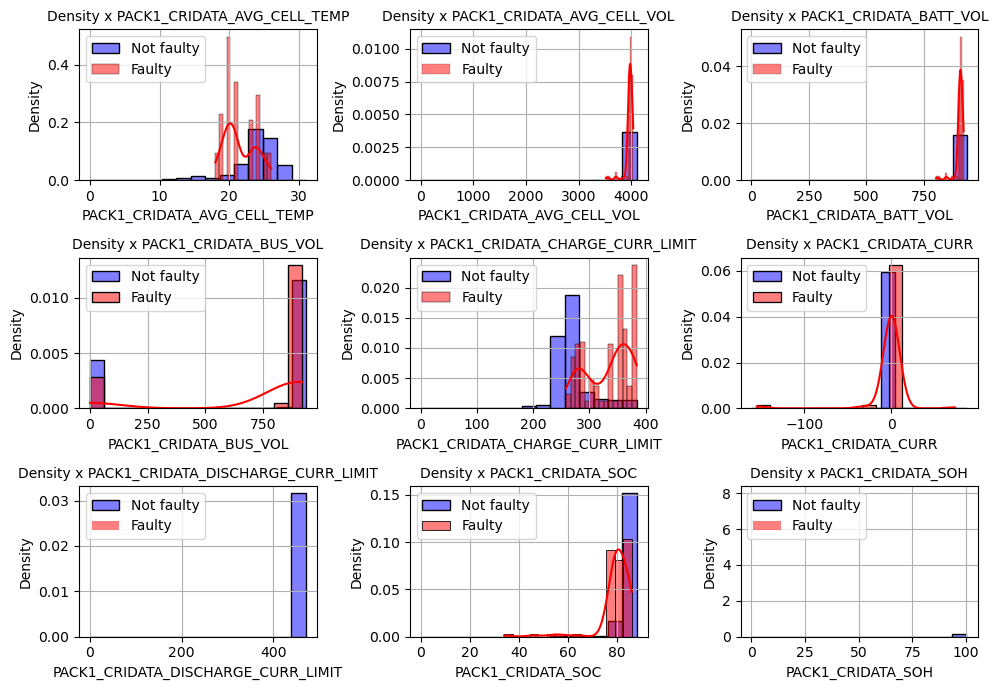

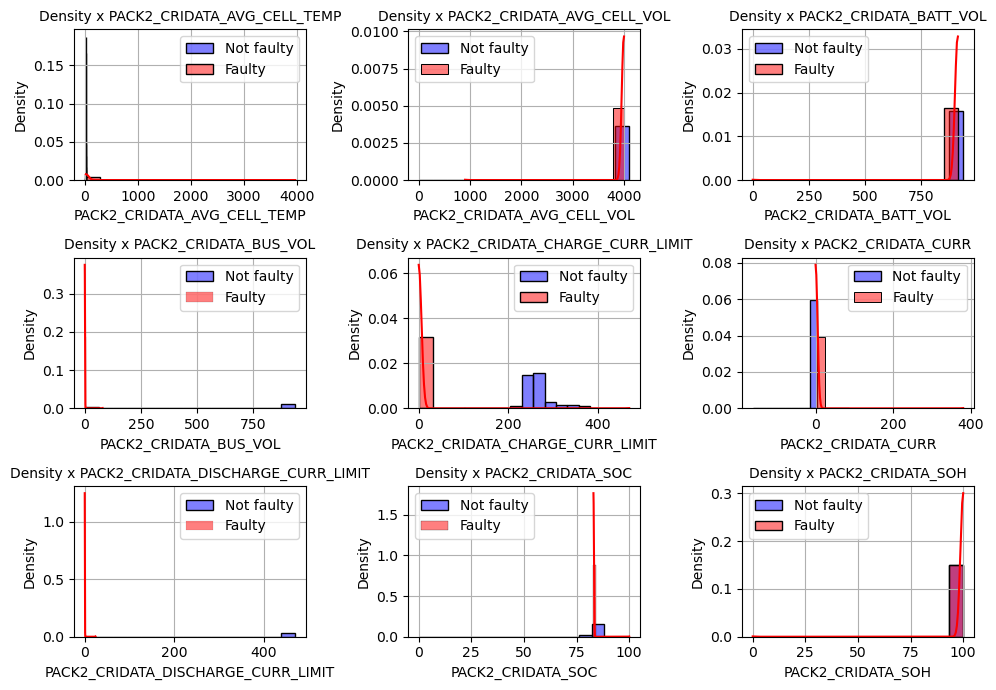

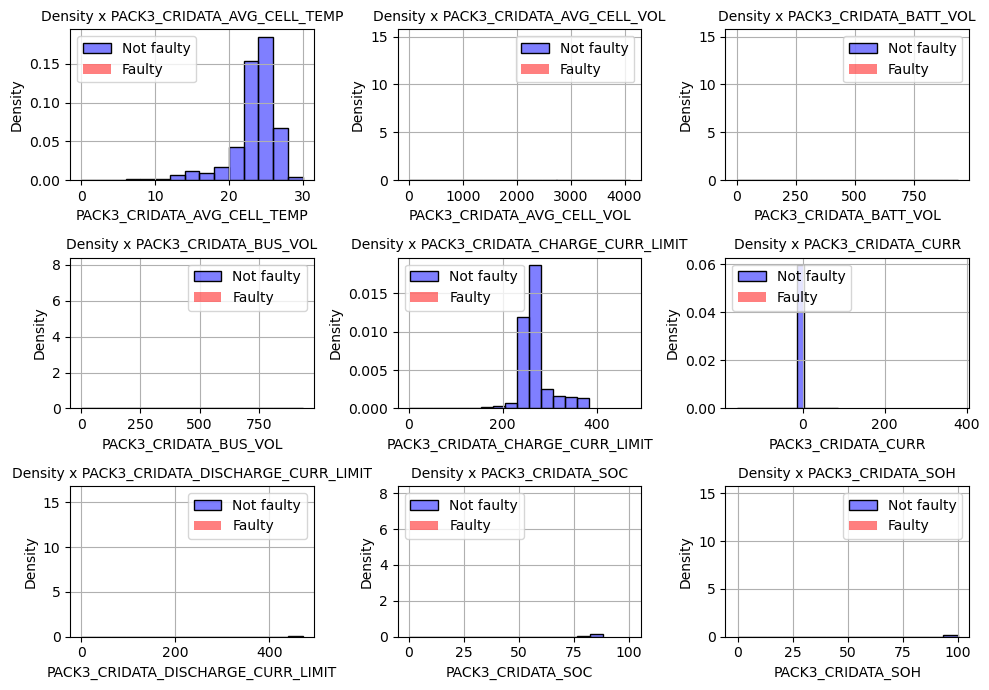

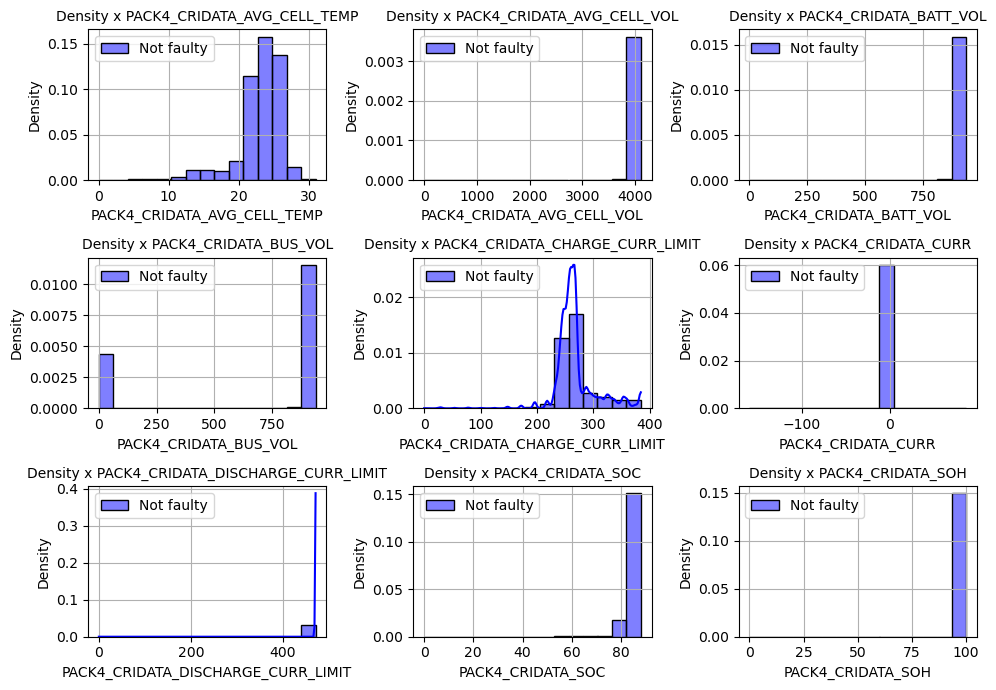

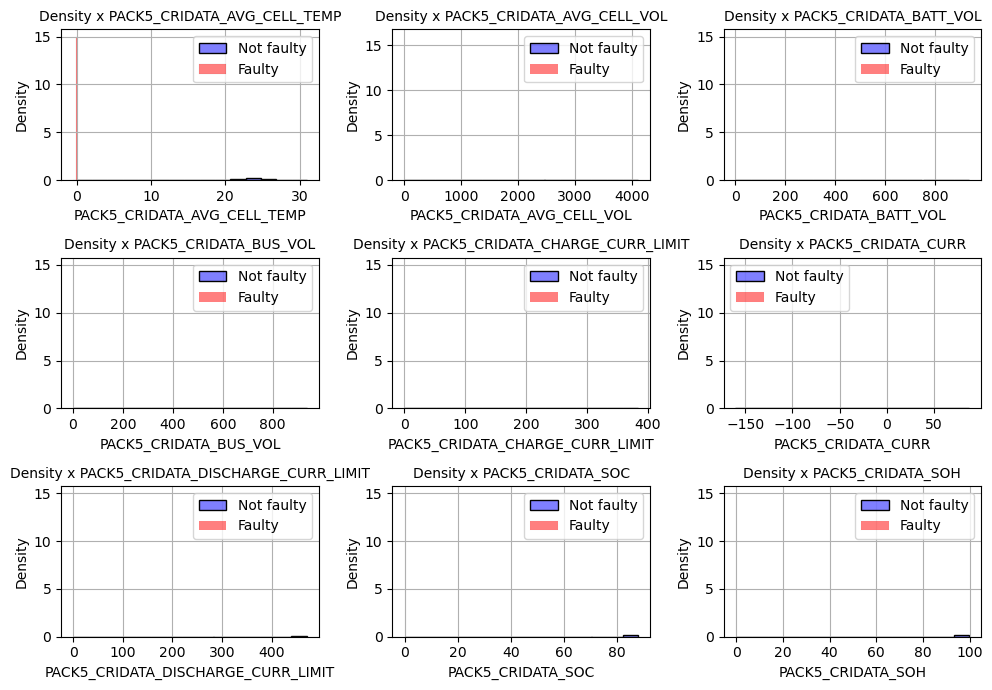

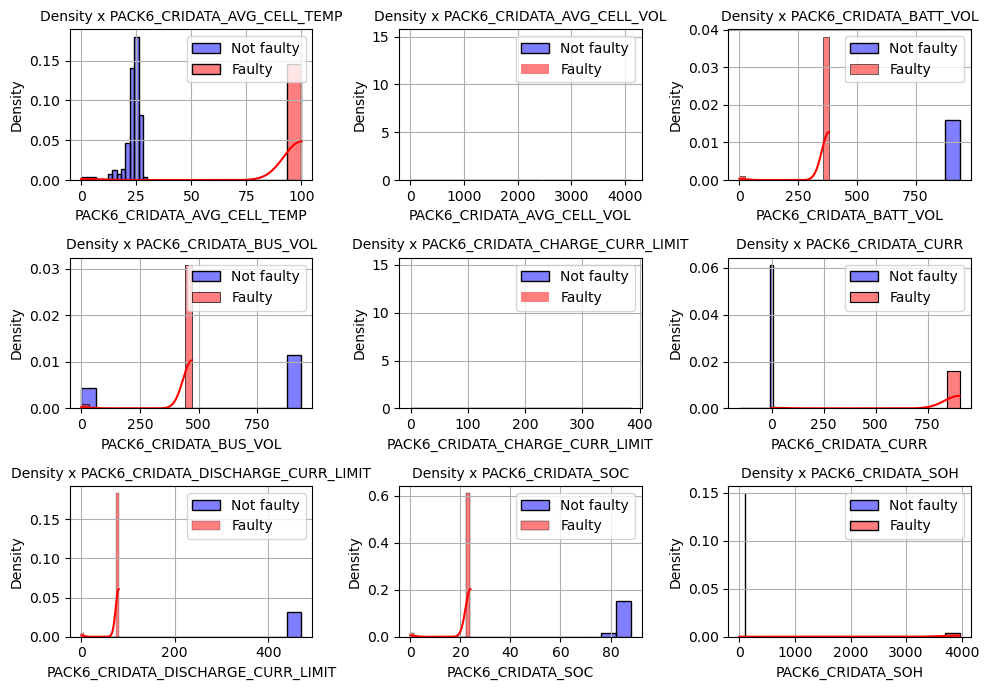

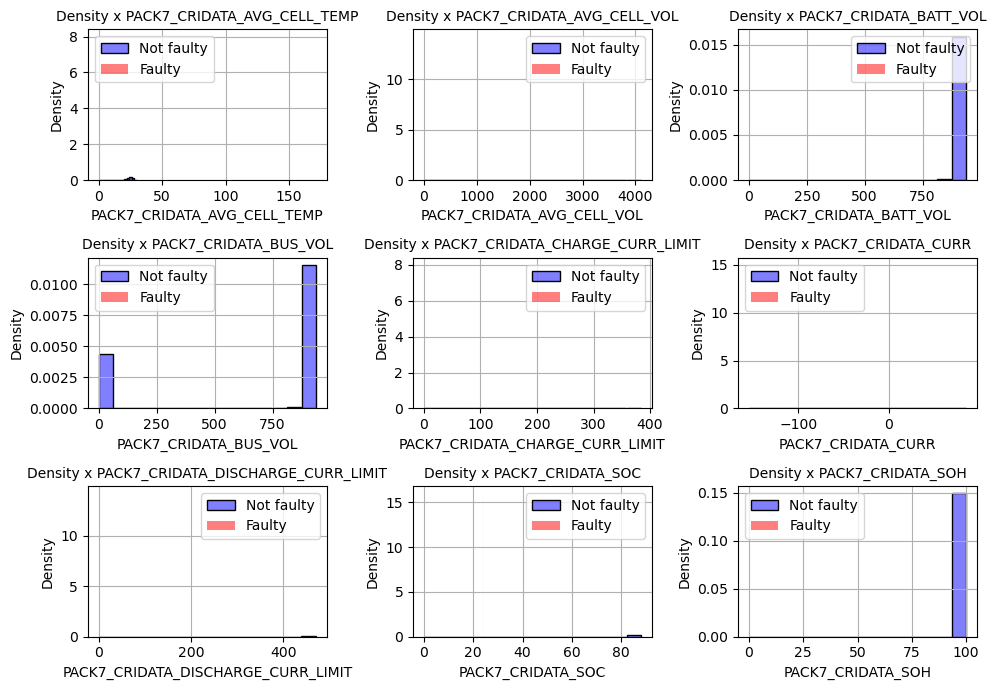

In [316]:
all_non_faulty_data = []
all_faulty_data = []

num_packs = 7
for pack_num in range(1, num_packs+1):
    fig, axes = plt.subplots(3, 3, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        column_to_plot = f"PACK{pack_num}_" + CRIDATA_COLUMNS[i]
        pack_fault_column = f"BATT_PACK_{pack_num}_FAULT"

        faulty_data_to_plot = faulty_data[faulty_data[pack_fault_column]==True][column_to_plot]
        non_faulty_data_to_plot = non_faulty_data[column_to_plot]

        sns.histplot(non_faulty_data_to_plot.dropna(), color="blue", label="Not faulty", kde=True, stat='density', bins=15, ax=ax)
        sns.histplot(faulty_data_to_plot.dropna(), color="red", label="Faulty", kde=True, stat='density', bins=15, ax=ax)

        ax.set_xlabel(column_to_plot)
        ax.grid(True)
        ax.set_title(f"Density x {column_to_plot}", fontsize=10)
        ax.legend()
    plt.tight_layout()

In [212]:
faulty_data[PACK1_CRIDATA_COLUMNS][:10]

PACK1_CRIDATA_AVG_CELL_TEMP  PACK1_CRIDATA_AVG_CELL_VOL  \
57770                       3962.0                       904.0   
58821                        100.0                         0.0   
58822                        100.0                         0.0   
58823                        100.0                         0.0   
58824                        100.0                         0.0   
58825                        100.0                         0.0   
58826                        100.0                         0.0   
58827                        100.0                         0.0   
58828                        100.0                         0.0   
58829                        100.0                         0.0   

       PACK1_CRIDATA_BATT_VOL  PACK1_CRIDATA_BUS_VOL  \
57770                     0.0                   80.0   
58821                   384.0                  471.0   
58822                   384.0                  471.0   
58823                   384.0                  471.0   
58824                   384.0                  471.0   
58825                   384.0                  471.0   
58826                   384.0                  471.0   
58827                   384.0                  471.0   
58828                   384.0                  471.0   
58829                   384.0                  471.0   

       PACK1_CRIDATA_CHARGE_CURR_LIMIT  PACK1_CRIDATA_CURR  \
57770                            471.0               381.0   
58821                              0.0               904.0   
58822                              0.0               904.0   
58823                              0.0               904.0   
58824                              0.0               904.0   
58825                              0.0               904.0   
58826                              0.0               904.0   
58827                              0.0               904.0   
58828                              0.0               904.0   
58829                              0.0               904.0   

       PACK1_CRIDATA_DISCHARGE_CURR_LIMIT  PACK1_CRIDATA_SOC  \
57770                                25.0              100.0   
58821                                79.0               26.0   
58822                                79.0               26.0   
58823                                79.0               26.0   
58824                                79.0               26.0   
58825                                79.0               26.0   
58826                                79.0               26.0   
58827                                79.0               26.0   
58828                                79.0               26.0   
58829                                79.0               26.0   

       PACK1_CRIDATA_SOH  
57770                0.0  
58821             3960.0  
58822             3960.0  
58823             3960.0  
58824             3960.0  
58825             3960.0  
58826             3960.0  
58827             3960.0  
58828             3960.0  
58829             3960.0

In [213]:
non_faulty_data[PACK1_CRIDATA_COLUMNS][:10]

PACK1_CRIDATA_AVG_CELL_TEMP  PACK1_CRIDATA_AVG_CELL_VOL  \
56023                         28.0                      3984.0   
56024                         28.0                      3984.0   
56027                         28.0                      3984.0   
56028                         28.0                      3984.0   
56052                         27.0                      3976.0   
56053                         27.0                      3974.0   
56054                         27.0                      3978.0   
56055                         27.0                      3978.0   
56056                         27.0                      3978.0   
56057                         27.0                      3978.0   

       PACK1_CRIDATA_BATT_VOL  PACK1_CRIDATA_BUS_VOL  \
56023                   909.0                  909.0   
56024                   909.0                  909.0   
56027                   909.0                  909.0   
56028                   909.0                  909.0   
56052                   907.0                  907.0   
56053                   907.0                  906.0   
56054                   908.0                    0.0   
56055                   908.0                    0.0   
56056                   908.0                    0.0   
56057                   908.0                    0.0   

       PACK1_CRIDATA_CHARGE_CURR_LIMIT  PACK1_CRIDATA_CURR  \
56023                            343.0            0.600098   
56024                            343.0            0.600098   
56027                            343.0           -0.099976   
56028                            343.0           -0.099976   
56052                            353.0           -9.101562   
56053                            355.0           -7.699219   
56054                            355.0            0.000000   
56055                            355.0            0.000000   
56056                            355.0            0.000000   
56057                            355.0            0.000000   

       PACK1_CRIDATA_DISCHARGE_CURR_LIMIT  PACK1_CRIDATA_SOC  \
56023                               471.0               81.0   
56024                               471.0               81.0   
56027                               471.0               81.0   
56028                               471.0               81.0   
56052                               471.0               80.0   
56053                               471.0               80.0   
56054                               471.0               80.0   
56055                               471.0               80.0   
56056                               471.0               80.0   
56057                               471.0               80.0   

       PACK1_CRIDATA_SOH  
56023              100.0  
56024              100.0  
56027              100.0  
56028              100.0  
56052              100.0  
56053              100.0  
56054              100.0  
56055              100.0  
56056              100.0  
56057              100.0

In [199]:
faulty_data[PACK1_CRIDATA_COLUMNS][:20]["PACK1_CRIDATA_SOH"].values.mean()

3762.0

### Correlation analysis

In [270]:
correlation_matrix = df_fault.corr()
correlation_matrix["FAULT"].sort_values(ascending=True)[50:]

/tmp/ipykernel_4537/1194050827.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_fault.corr()


PACK7_CRIDATA_CURR            -0.002138
AvgSOC                        -0.000265
Current                       -0.000260
PACK_2_STATUS                 -0.000221
PACK_7_STATUS                  0.008004
PACK_1_STATUS                  0.008145
MIN_UNCONN_PACK_VOL            0.011341
MAX_UNCONN_PACK_VOL            0.023210
PACK_4_STATUS                  0.024390
PACK2_CRIDATA_AVG_CELL_TEMP    0.368983
PACK1_CRIDATA_AVG_CELL_TEMP    0.384205
PACK3_CRIDATA_AVG_CELL_TEMP    0.384475
PACK5_CRIDATA_AVG_CELL_TEMP    0.460665
PACK_6_STATUS                  0.486319
PACK4_CRIDATA_AVG_CELL_TEMP    0.506152
PACK6_CRIDATA_AVG_CELL_TEMP    0.508007
PACK7_CRIDATA_AVG_CELL_TEMP    0.730101
MAX_CELL_VOL                   0.753831
MIN_CELL_VOL                   0.754749
MAX_CELL_TEMP                  0.786935
PACK_5_STATUS                  0.793508
PACK5_CRIDATA_CURR             0.797598
PACK3_CRIDATA_CURR             0.798201
PACK4_CRIDATA_CURR             0.798380
PACK6_CRIDATA_CURR             0.798396


Text(0.5, 0.98, 'Top 50 correlated features to FAULT')

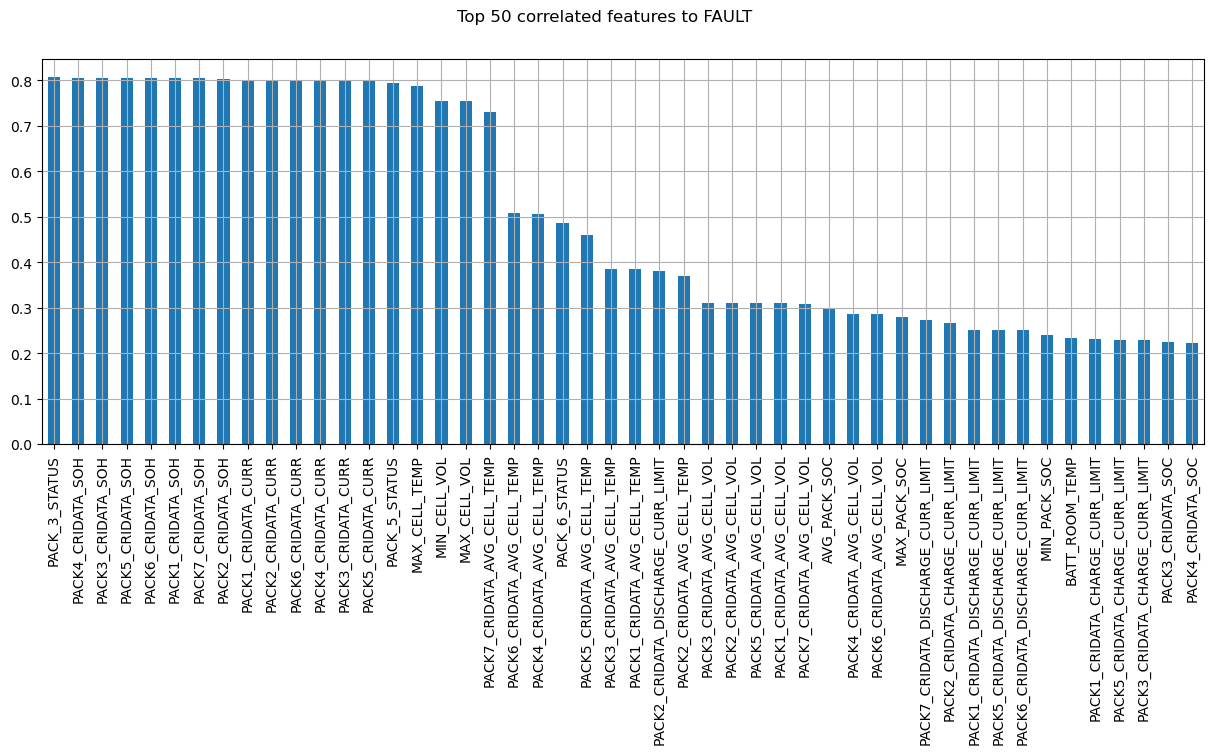

In [272]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
correlation_matrix["FAULT"].abs().sort_values(ascending=False)[2:50].plot.bar()
plt.xlabel('', fontsize=64)
plt.ylabel('', fontsize=64)
plt.grid(True)
plt.suptitle("Top 50 correlated features to FAULT")

### Categorical column

Frequency of disconnected PACK_1 by PACK_1 faults = 17


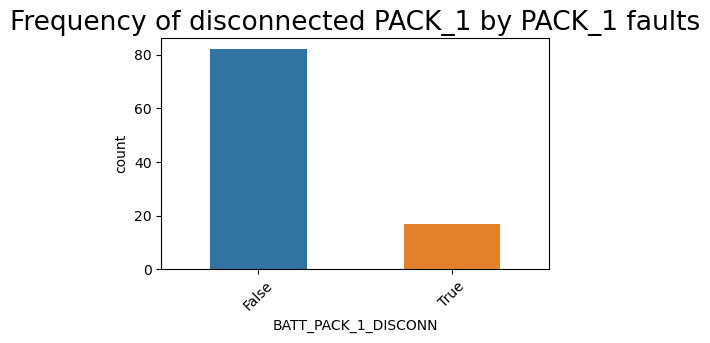

Frequency of disconnected PACK_2 by PACK_2 faults = 480


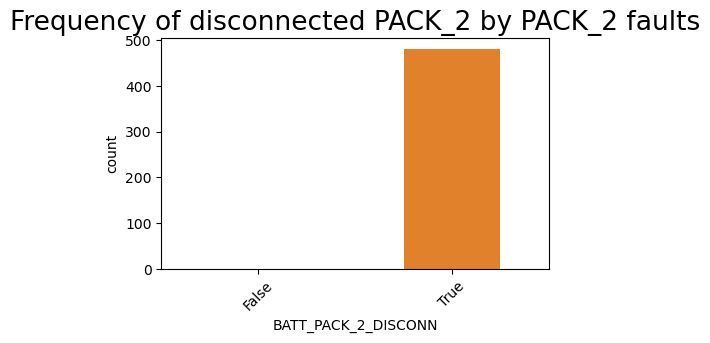

Frequency of disconnected PACK_3 by PACK_3 faults = True


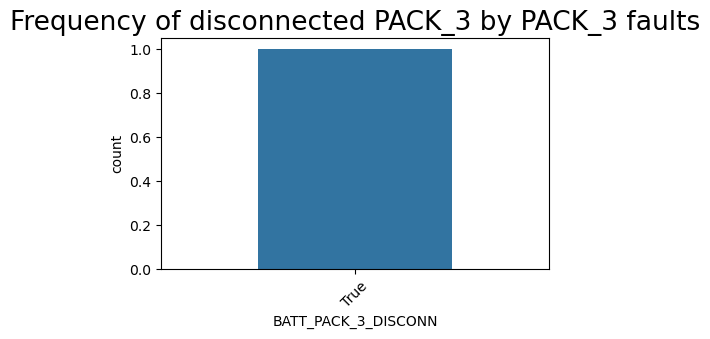

Frequency of disconnected PACK_4 by PACK_4 faults = 0
Frequency of disconnected PACK_5 by PACK_5 faults = True


<Figure size 500x300 with 0 Axes>

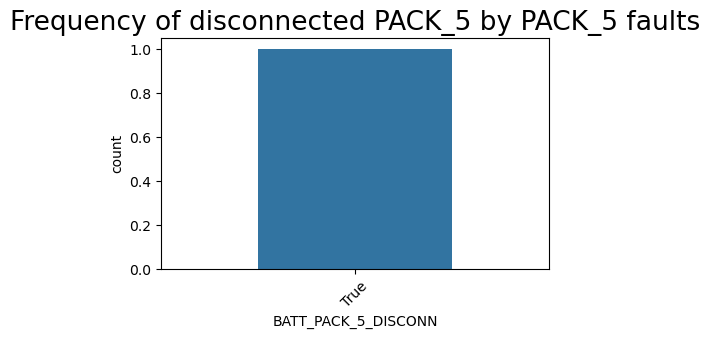

Frequency of disconnected PACK_6 by PACK_6 faults = 1


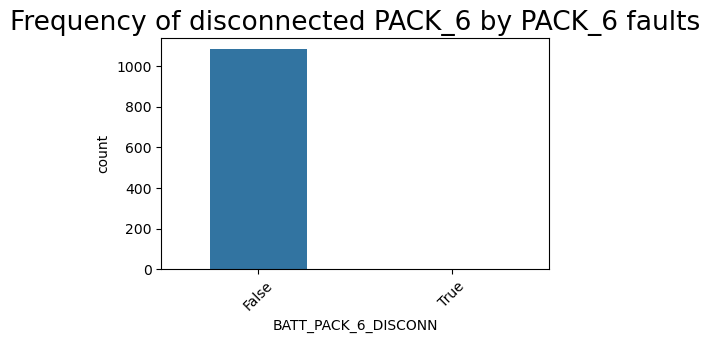

Frequency of disconnected PACK_7 by PACK_7 faults = 1084


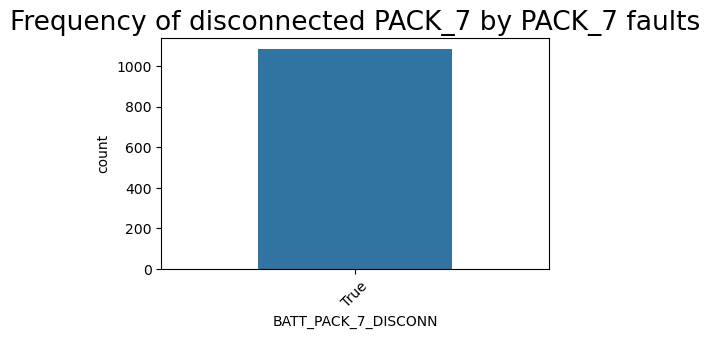

In [56]:
# Categorical column
PACKS = [f"PACK_{i}" for i in range(1, 8)]
for pack in PACKS:
    pack_fault_column = f"BATT_{pack}_FAULT"
    pack_disconn_column = f"BATT_{pack}_DISCONN"

    df_pack_fault = df_fault[df_fault[pack_fault_column]==1][pack_disconn_column]

    print(f"Frequency of disconnected {pack} by {pack} faults = {df_pack_fault.sum()}")

    try:
        plt.figure(figsize=(5,3))

        g1 = sns.countplot(x=df_pack_fault, width=0.5)

        g1.set_title(f"Frequency of disconnected {pack} by {pack} faults", fontsize=19)

        g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
        plt.show()
    except:
        pass

## Find true sequences

In [194]:
import pandas as pd

PACK_FAULT_COLUMN = 'BATT_PACK_6_FAULT'

# Find the indices where the flag_column changes from True to False
indices = df_fault.index[(df_fault[PACK_FAULT_COLUMN] == True) & (df_fault[PACK_FAULT_COLUMN].shift(1) == False)]

# Create a list to store the sequences
true_sequences = []

# Iterate through the indices to extract sequences
for start_index in indices:
    end_index = df_fault.index[(df_fault.index > start_index) & (df_fault[PACK_FAULT_COLUMN] == False)].min()
    sequence = df_fault.loc[start_index:end_index-1]
    true_sequences.append(sequence)

# 'true_sequences' now contains all the sequences of True values

In [196]:
for true_sequence in true_sequences:
    print(true_sequence[ALL_FAULT_COLUMNS])

      BATT_PACK_1_FAULT BATT_PACK_2_FAULT BATT_PACK_3_FAULT BATT_PACK_4_FAULT  \
57770             False              True              True             False   
57771             False             False             False             False   
57772             False             False             False             False   
57773             False             False             False             False   
57774             False             False             False             False   
...                 ...               ...               ...               ...   
57832             False             False             False             False   
57833             False             False             False             False   
57834             False             False             False             False   
57835             False             False             False             False   
57836             False             False             False             False   

      BATT_PACK_5_FAULT BAT

In [186]:
indices

Int64Index([57770, 57838, 58234], dtype='int64')

In [183]:
true_sequences

[                       time  AVG_PACK_SOC  AvgSOC  AvgSOH BATT_PACK_1_DISCONN  \
 57836  2022-10-19T07:35:00Z           0.0     0.0     0.0                True   
 
       BATT_PACK_1_FAULT BATT_PACK_1_WARN BATT_PACK_2_DISCONN  \
 57836             False            False                True   
 
       BATT_PACK_2_FAULT BATT_PACK_2_WARN  ... PACK_2_STATUS PACK_3_STATUS  \
 57836             False            False  ...           0.0         904.0   
 
       PACK_4_STATUS PACK_5_STATUS PACK_6_STATUS PACK_7_STATUS RunningState  \
 57836           0.0          80.0         100.0           0.0         None   
 
       Voltage       valuestreamname FAULT  
 57836     0.0  ISS.Onshore.Model.VS     1  
 
 [1 rows x 111 columns],
                        time  AVG_PACK_SOC  AvgSOC  AvgSOH BATT_PACK_1_DISCONN  \
 58232  2022-10-19T14:11:00Z           0.0     0.0     0.0                True   
 
       BATT_PACK_1_FAULT BATT_PACK_1_WARN BATT_PACK_2_DISCONN  \
 58232             False            